In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data_raw=pd.read_csv('./data/BRCA1_HUMAN_Findlay_2018.csv')
data_raw.head(5)

,mutant,mutated_sequence,DMS_score,DMS_score_bin
0,M1I,IDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-2.502128,0
1,M1V,VDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-2.025645,0
2,M1T,TDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-1.656569,0
3,M1R,RDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-2.481580,0
4,M1L,LDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-2.516529,0


In [4]:
data_raw.shape

(1837, 4)

In [5]:
data_raw

,mutant,mutated_sequence,DMS_score,DMS_score_bin
0,M1I,IDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-2.502128,0
1,M1V,VDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-2.025645,0
2,M1T,TDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-1.656569,0
3,M1R,RDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-2.481580,0
4,M1L,LDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-2.516529,0
...,...,...,...,...
1832,I1855R,MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-0.464328,1
1833,I1855M,MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,0.021941,1
1834,I1855L,MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,0.233297,1
1835,I1855K,MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-0.863844,1


In [6]:
df=data_raw.copy()

In [108]:
import re 

def get_number_from_text(text):
    return re.findall(r'\d{1,4}',text)[0]

In [109]:
get_number_from_text('A10B')

'10'

In [9]:
df

,mutant,mutated_sequence,DMS_score,DMS_score_bin
0,M1I,IDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-2.502128,0
1,M1V,VDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-2.025645,0
2,M1T,TDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-1.656569,0
3,M1R,RDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-2.481580,0
4,M1L,LDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-2.516529,0
...,...,...,...,...
1832,I1855R,MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-0.464328,1
1833,I1855M,MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,0.021941,1
1834,I1855L,MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,0.233297,1
1835,I1855K,MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-0.863844,1


In [111]:
df_g = df.groupby(by=['position', 'DMS_score_bin']).apply(lambda x: x['DMS_score_bin'] == 1)

KeyError: 'position'

In [110]:
df_g

NameError: name 'df_g' is not defined

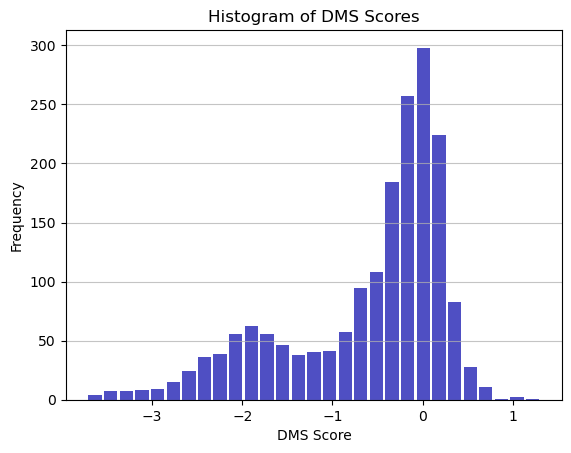

In [11]:
dms_scores = data_raw['DMS_score']
n, bins, patches = plt.hist(x=dms_scores, bins='auto', color='#0504aa', alpha=0.7, rwidth=0.85)

# Add labels and title
plt.xlabel('DMS Score')
plt.ylabel('Frequency')
plt.title('Histogram of DMS Scores')

# Add a grid
plt.grid(axis='y', alpha=0.75)

# Show the histogram
plt.show()

In [12]:
print(data_raw.columns)

Index(['mutant', 'mutated_sequence', 'DMS_score', 'DMS_score_bin'], dtype='object')


In [13]:
position = [1, 1, 1, 1, 1, 2, 2, 2, 2, 2, ..., 1855, 1855, 1855, 1855, 1855]  # replace with your own data

In [14]:
position_df = pd.DataFrame({'position': position})

In [15]:
data_with_position = pd.concat([data_raw, position_df], axis=1)

In [16]:
print(data_with_position.columns)

Index(['mutant', 'mutated_sequence', 'DMS_score', 'DMS_score_bin', 'position'], dtype='object')


In [17]:
print(data_raw.columns)

Index(['mutant', 'mutated_sequence', 'DMS_score', 'DMS_score_bin'], dtype='object')


In [18]:
data_raw['position'] = data_raw['mutant'].str.extract('(\d+)').astype(int)

In [19]:
print(data_raw.head())

  mutant                                   mutated_sequence  DMS_score  \
0    M1I  IDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...  -2.502128   
1    M1V  VDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...  -2.025645   
2    M1T  TDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...  -1.656569   
3    M1R  RDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...  -2.481580   
4    M1L  LDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...  -2.516529   

   DMS_score_bin  position  
0              0         1  
1              0         1  
2              0         1  
3              0         1  
4              0         1  


In [20]:
print(data_raw.columns)

Index(['mutant', 'mutated_sequence', 'DMS_score', 'DMS_score_bin', 'position'], dtype='object')


In [21]:
from sklearn.preprocessing import MinMaxScaler

In [22]:
scaler = MinMaxScaler()

In [23]:
data_raw['DMS_score_normalized'] = scaler.fit_transform(data_raw[['DMS_score']])

In [24]:
print(data_raw)

      mutant                                   mutated_sequence  DMS_score  \
0        M1I  IDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...  -2.502128   
1        M1V  VDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...  -2.025645   
2        M1T  TDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...  -1.656569   
3        M1R  RDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...  -2.481580   
4        M1L  LDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...  -2.516529   
...      ...                                                ...        ...   
1832  I1855R  MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...  -0.464328   
1833  I1855M  MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...   0.021941   
1834  I1855L  MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...   0.233297   
1835  I1855K  MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...  -0.863844   
1836  I1855T  MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...  -0.291519   

      DMS_score_bin  position  DMS_score_normalized  
0        

In [25]:
data_raw['dms_score_normalized'] = (data_raw['DMS_score'] - data_raw['DMS_score'].min()) / (data_raw['DMS_score'].max() - data_raw['DMS_score'].min())

In [26]:
data_pivot = data_raw.pivot(index='mutant', columns='position', values='dms_score_normalized')


In [27]:
import seaborn as sns

In [28]:
'data_raw["new_aa"]=test1[1]
data_raw.head'

SyntaxError: unterminated string literal (detected at line 1) (2623361666.py, line 1)

In [29]:
test1=data_raw.mutant.str.extract(r'(\d)([ARNDCQEGHILKTMfPOUSTWYV])')
test1

,0,1
0,1,I
1,1,V
2,1,T
3,1,R
4,1,L
...,...,...
1832,5,R
1833,5,M
1834,5,L
1835,5,K


In [30]:
data_raw["new_aa"]=test1[1]
data_raw.head

<bound method NDFrame.head of       mutant                                   mutated_sequence  DMS_score  \
0        M1I  IDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...  -2.502128   
1        M1V  VDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...  -2.025645   
2        M1T  TDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...  -1.656569   
3        M1R  RDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...  -2.481580   
4        M1L  LDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...  -2.516529   
...      ...                                                ...        ...   
1832  I1855R  MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...  -0.464328   
1833  I1855M  MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...   0.021941   
1834  I1855L  MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...   0.233297   
1835  I1855K  MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...  -0.863844   
1836  I1855T  MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...  -0.291519   

      DMS_score_bin  position  DM

In [31]:
print(data_raw.columns)

Index(['mutant', 'mutated_sequence', 'DMS_score', 'DMS_score_bin', 'position',
       'DMS_score_normalized', 'dms_score_normalized', 'new_aa'],
      dtype='object')


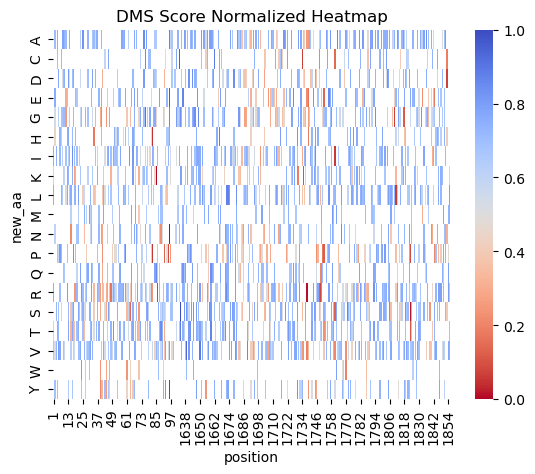

In [32]:
# create a pivot table with 'position' as index, 'new_aa' as columns, and 'dms_score_normalized' as values
pivot_table = data_raw.pivot_table(index='new_aa', columns='position', values='dms_score_normalized', aggfunc='mean')

# plot the heatmap
sns.heatmap(pivot_table, cmap='coolwarm_r')

# add labels and title
plt.xlabel('position')
plt.ylabel('new_aa')
plt.title('DMS Score Normalized Heatmap')
plt.show()

In [33]:
# create a boolean mask for rows where 'DMS_score_bin' is not 1
mask = data_raw['DMS_score_bin'] != 1

# use boolean indexing to filter the data and create a new DataFrame
filtered_data = data_raw[mask]

# print the shape of the filtered data to verify that rows have been removed
print(filtered_data.shape)

(474, 8)


In [34]:
copy_raw = data_raw[data_raw['DMS_score_bin'] == 0].copy()

In [35]:
copy_raw

,mutant,mutated_sequence,DMS_score,DMS_score_bin,position,DMS_score_normalized,dms_score_normalized,new_aa
0,M1I,IDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-2.502128,0,1,0.242003,0.242003,I
1,M1V,VDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-2.025645,0,1,0.336824,0.336824,V
2,M1T,TDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-1.656569,0,1,0.410270,0.410270,T
3,M1R,RDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-2.481580,0,1,0.246092,0.246092,R
4,M1L,LDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-2.516529,0,1,0.239137,0.239137,L
...,...,...,...,...,...,...,...,...
1822,Y1853D,MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-3.351372,0,1853,0.073003,0.073003,D
1823,Y1853C,MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-2.763438,0,1853,0.190002,0.190002,C
1824,Y1853S,MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-1.698237,0,1853,0.401978,0.401978,S
1825,Y1853N,MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-2.167195,0,1853,0.308655,0.308655,N


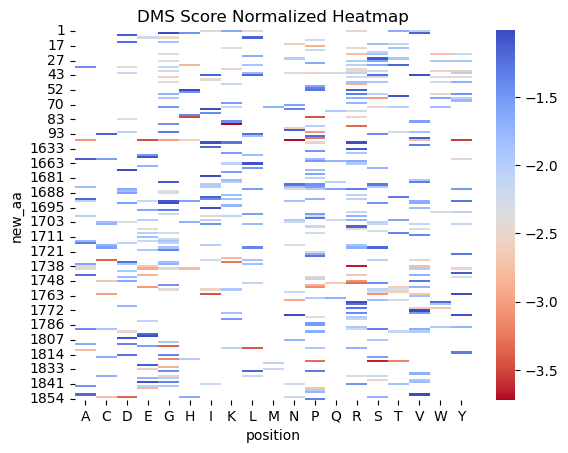

In [36]:
# create a pivot table with 'position' as index, 'new_aa' as columns, and 'dms_score_normalized' as values
pivot_table = copy_raw.pivot_table(index='position', columns='new_aa', values='DMS_score', aggfunc='mean')

# plot the heatmap
sns.heatmap(pivot_table, cmap='coolwarm_r')

# add labels and title
plt.xlabel('position')
plt.ylabel('new_aa')
plt.title('DMS Score Normalized Heatmap')
plt.show()

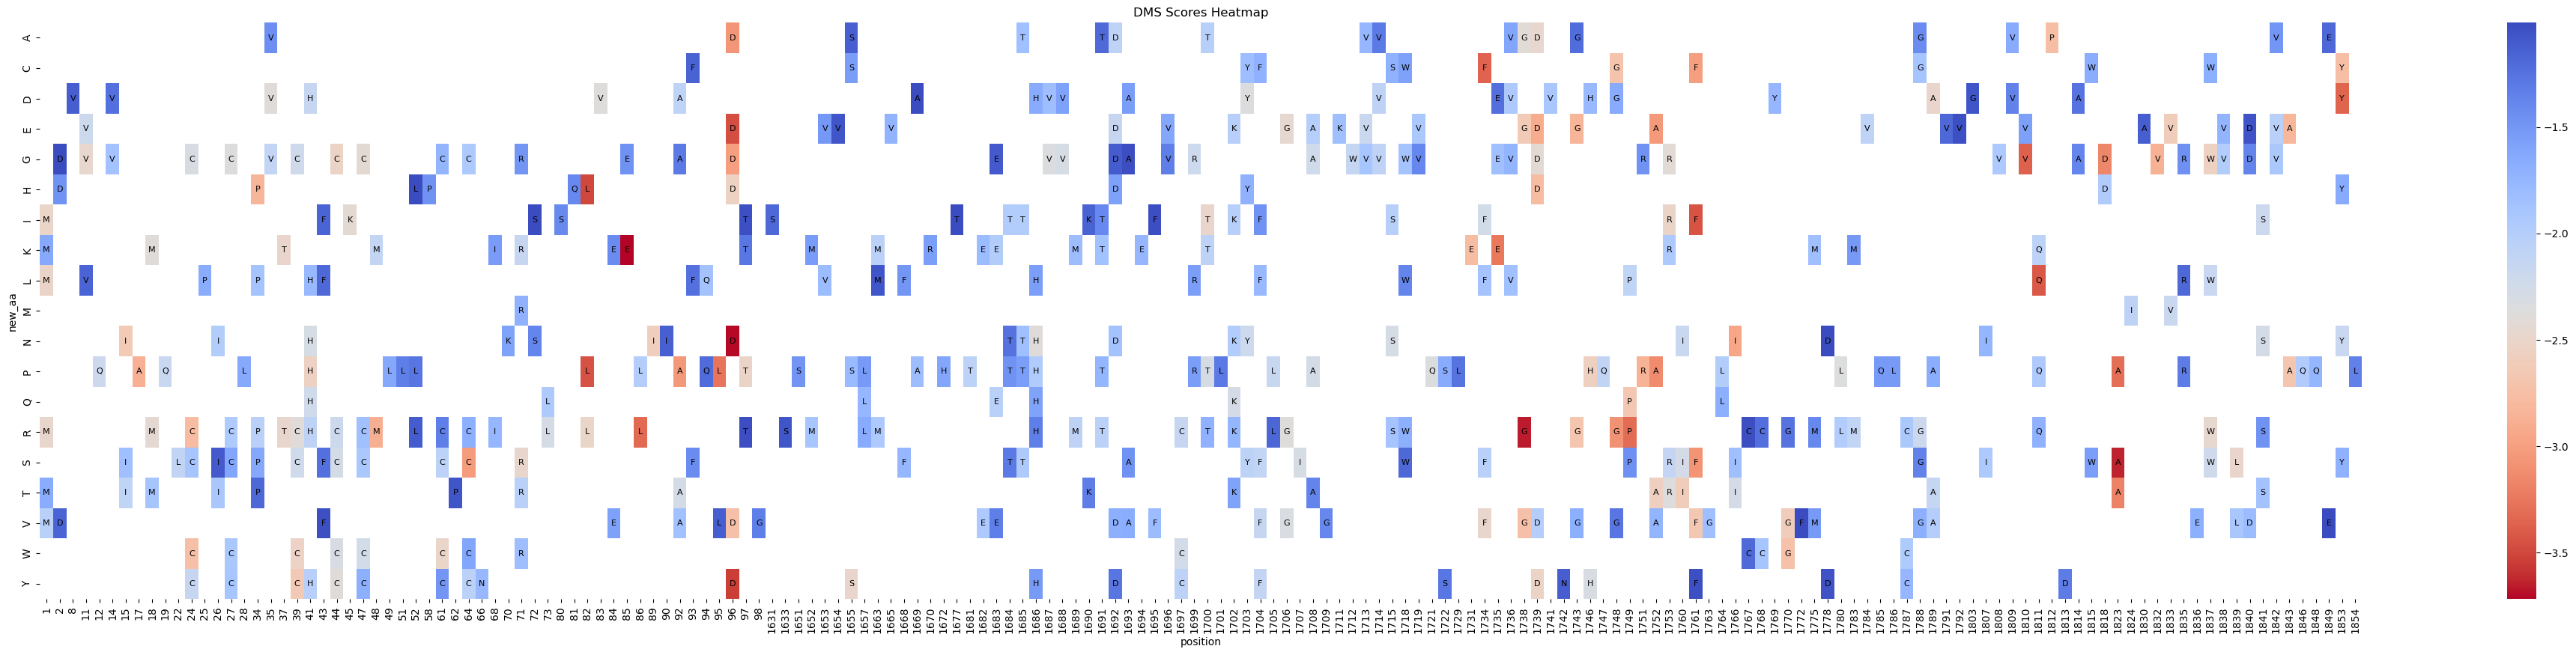

In [120]:
# create a pivot table with 'position' as index, 'new_aa' as columns, and 'dms_score_normalized' as values
pivot_table = copy_raw.pivot_table(index='new_aa', columns='position', values='DMS_score', aggfunc='mean')

fig, ax = plt.subplots(figsize=(50,10))

# plot the heatmap
sns.heatmap(pivot_table, cmap='coolwarm_r')

# add annotations for the "old_aa" values
for i in range(len(pivot_table.index)):
    for j in range(len(pivot_table.columns)):
        new_aa = pivot_table.index[i]
        position = pivot_table.columns[j]
        old_aa = copy_raw[(copy_raw['new_aa'] == new_aa) & (copy_raw['position'] == position)]['old_aa'].values
        if len(old_aa) > 0:
            ax.text(j + 0.5, i + 0.5, old_aa[0], ha='center', va='center', fontsize=8)

# add labels and title
plt.xlabel('position')
plt.ylabel('new_aa')
plt.title('DMS Scores Heatmap')

plt.show()


In [38]:
# List of polar amino acids
polar_amino_acids = ['S', 'T', 'Y', 'C', 'N', 'Q']

# Filter the dataset for polar amino acids
polar_data = copy_raw[copy_raw['new_aa'].isin(polar_amino_acids)][['new_aa', 'DMS_score']]

# Print the filtered dataset
print(polar_data)

     new_aa  DMS_score
2         T  -1.656569
84        T  -2.096973
88        S  -1.834711
89        N  -2.633053
108       T  -1.887430
...     ...        ...
1750      T  -1.863429
1752      N  -2.262144
1823      C  -2.763438
1824      S  -1.698237
1825      N  -2.167195

[118 rows x 2 columns]


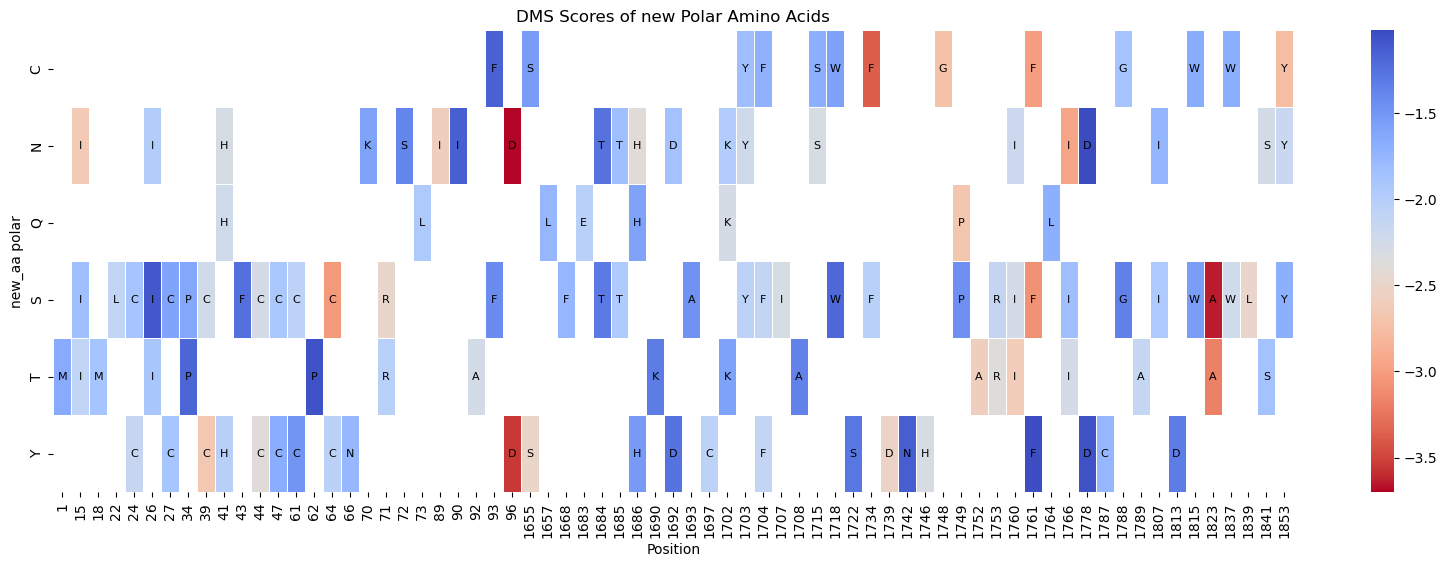

In [132]:
# List of polar amino acids
polar_amino_acids = ['S', 'T', 'Y', 'C', 'N', 'Q']

# Filter the dataset for polar amino acids
polar_data = copy_raw[copy_raw['new_aa'].isin(polar_amino_acids)][['new_aa', 'position', 'DMS_score', 'old_aa']]

# Create a pivot table with 'new_aa' as index, 'position' as columns, and 'DMS_score' as values
pivot_table = polar_data.pivot_table(index='new_aa', columns='position', values='DMS_score', aggfunc='mean')

# Set the figure size
plt.figure(figsize=(20, 6))

# Plot the heatmap
sns.heatmap(pivot_table, cmap='coolwarm_r', annot=False, linewidths=0.5)

# Add annotations for the "old_aa" values
for i in range(len(pivot_table.index)):
    for j in range(len(pivot_table.columns)):
        new_aa = pivot_table.index[i]
        position = pivot_table.columns[j]
        old_aa = polar_data[(polar_data['new_aa'] == new_aa) & (polar_data['position'] == position)]['old_aa'].values
        if len(old_aa) > 0:
            plt.text(j + 0.5, i + 0.5, old_aa[0], ha='center', va='center', fontsize=8)

# Add labels and title
plt.xlabel('Position')
plt.ylabel('new_aa polar')
plt.title('DMS Scores of new Polar Amino Acids')

# Display the heatmap
plt.show()


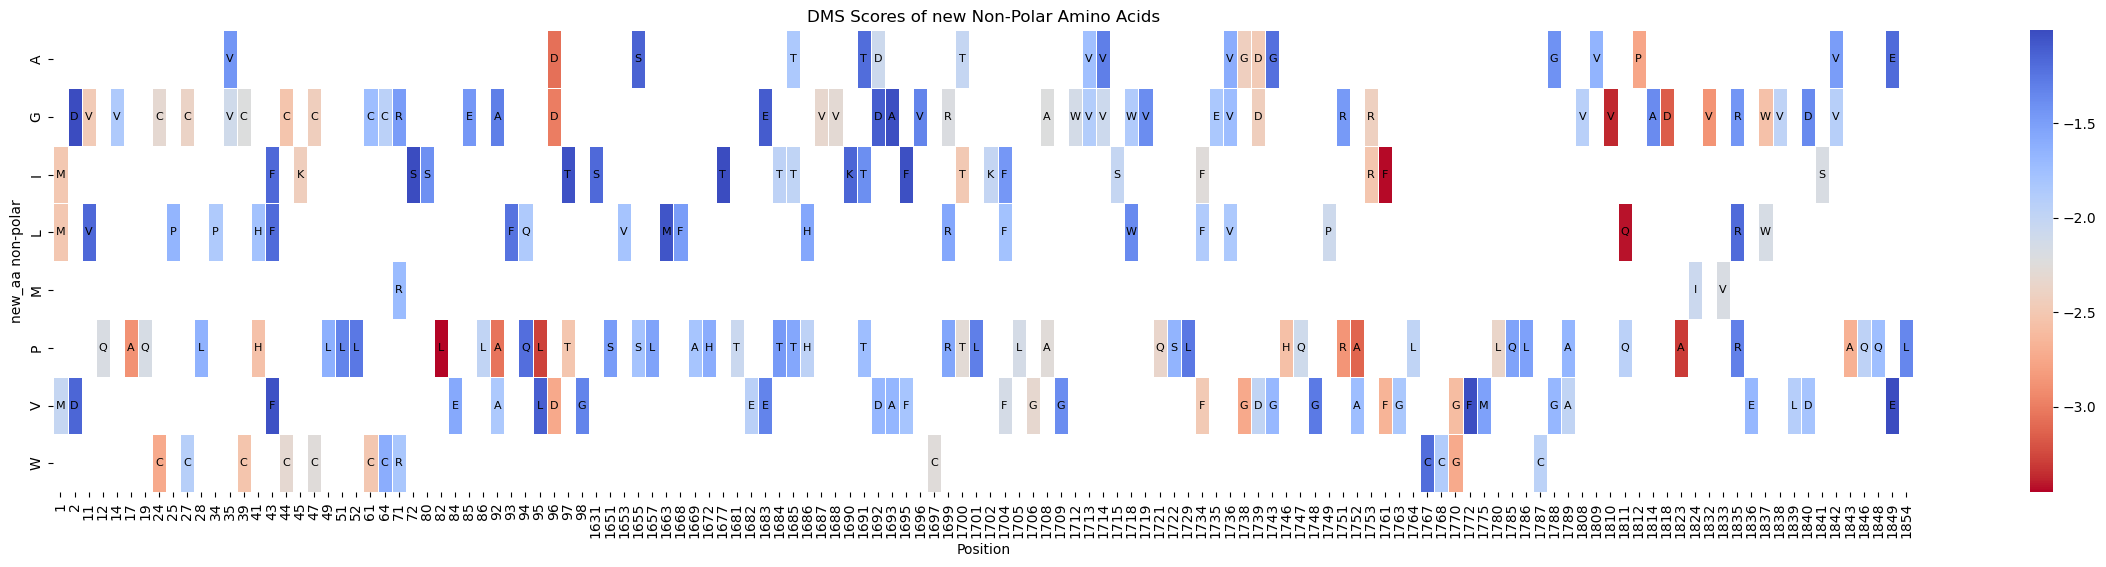

In [133]:
# List of non-polar amino acids
non_polar_amino_acids = ['A', 'V', 'L', 'I', 'P', 'M', 'F', 'W', 'G']

# Filter the dataset for non-polar amino acids
non_polar_data = copy_raw[copy_raw['new_aa'].isin(non_polar_amino_acids)][['new_aa', 'position', 'DMS_score']]

# Merge with the original dataframe to include the "old_aa" column
non_polar_data = non_polar_data.merge(copy_raw[['new_aa', 'position', 'old_aa']], on=['new_aa', 'position'])

# Create a pivot table with 'new_aa' as index, 'position' as columns, and 'DMS_score' as values
pivot_table = non_polar_data.pivot_table(index='new_aa', columns='position', values='DMS_score', aggfunc='mean')

# Set the figure size
plt.figure(figsize=(30, 6))

# Plot the heatmap
sns.heatmap(pivot_table, cmap='coolwarm_r', annot=False, linewidths=0.5)

# Add annotations for the "old_aa" values
for i in range(len(pivot_table.index)):
    for j in range(len(pivot_table.columns)):
        new_aa = pivot_table.index[i]
        position = pivot_table.columns[j]
        old_aa = non_polar_data[(non_polar_data['new_aa'] == new_aa) & (non_polar_data['position'] == position)]['old_aa'].values
        if len(old_aa) > 0:
            plt.text(j + 0.5, i + 0.5, old_aa[0], ha='center', va='center', fontsize=8)

# Add labels and title
plt.xlabel('Position')
plt.ylabel('new_aa non-polar')
plt.title('DMS Scores of new Non-Polar Amino Acids')

# Display the heatmap
plt.show()


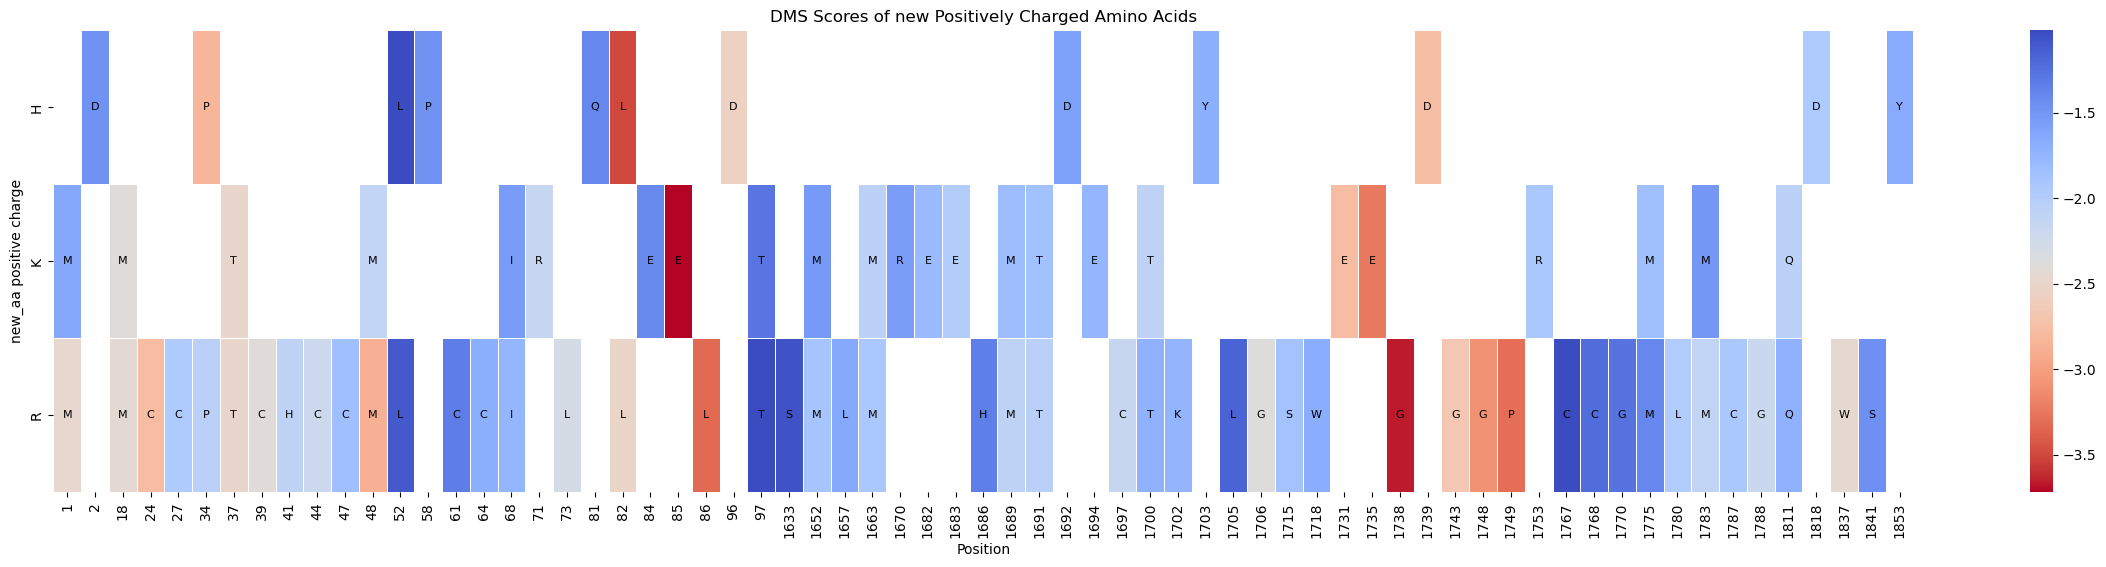

In [134]:
# List of positively charged amino acids
positively_charged_amino_acids = ['R', 'H', 'K']

# Filter the dataset for positively charged amino acids
positively_charged_data = copy_raw[copy_raw['new_aa'].isin(positively_charged_amino_acids)][['new_aa', 'position', 'DMS_score', 'old_aa']]

# Create a pivot table with 'new_aa' as index, 'position' as columns, and 'DMS_score' as values
pivot_table = positively_charged_data.pivot_table(index='new_aa', columns='position', values='DMS_score', aggfunc='mean')

# Set the figure size
plt.figure(figsize=(30, 6))

# Plot the heatmap
sns.heatmap(pivot_table, cmap='coolwarm_r', annot=False, linewidths=0.5)

# Add annotations for the "old_aa" values
for i in range(len(pivot_table.index)):
    for j in range(len(pivot_table.columns)):
        new_aa = pivot_table.index[i]
        position = pivot_table.columns[j]
        old_aa = positively_charged_data[(positively_charged_data['new_aa'] == new_aa) & (positively_charged_data['position'] == position)]['old_aa'].values
        if len(old_aa) > 0:
            plt.text(j + 0.5, i + 0.5, old_aa[0], ha='center', va='center', fontsize=8)

# Add labels and title
plt.xlabel('Position')
plt.ylabel('new_aa positive charge')
plt.title('DMS Scores of new Positively Charged Amino Acids')

# Display the heatmap
plt.show()


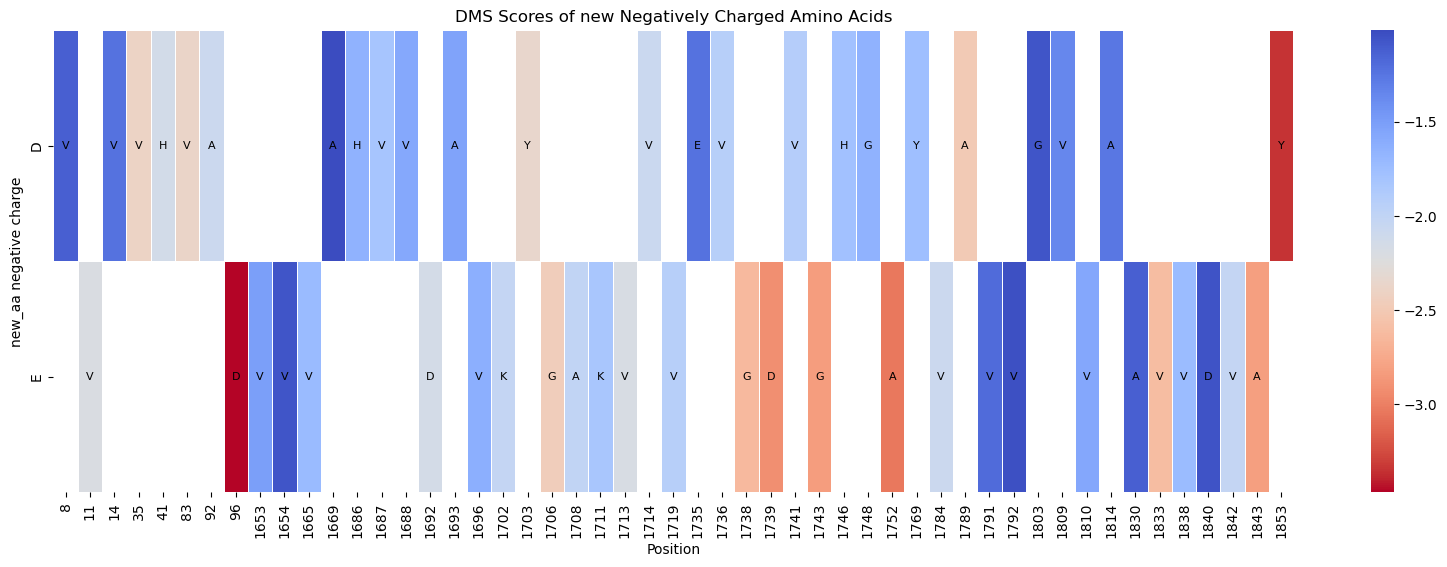

In [135]:
# List of negatively charged amino acids
negatively_charged_amino_acids = ['D', 'E']

# Filter the dataset for negatively charged amino acids
negatively_charged_data = copy_raw[copy_raw['new_aa'].isin(negatively_charged_amino_acids)][['new_aa', 'position', 'DMS_score', 'old_aa']]

# Create a pivot table with 'new_aa' as index, 'position' as columns, and 'DMS_score' as values
pivot_table = negatively_charged_data.pivot_table(index='new_aa', columns='position', values='DMS_score', aggfunc='mean')

# Set the figure size
plt.figure(figsize=(20, 6))

# Plot the heatmap
sns.heatmap(pivot_table, cmap='coolwarm_r', annot=False, linewidths=0.5)

# Add annotations for the "old_aa" values
for i in range(len(pivot_table.index)):
    for j in range(len(pivot_table.columns)):
        new_aa = pivot_table.index[i]
        position = pivot_table.columns[j]
        old_aa = negatively_charged_data[(negatively_charged_data['new_aa'] == new_aa) & (negatively_charged_data['position'] == position)]['old_aa'].values
        if len(old_aa) > 0:
            plt.text(j + 0.5, i + 0.5, old_aa[0], ha='center', va='center', fontsize=8)

# Add labels and title
plt.xlabel('Position')
plt.ylabel('new_aa negative charge')
plt.title('DMS Scores of new Negatively Charged Amino Acids')

# Display the heatmap
plt.show()


In [43]:
# Add a new column 'old_aa' using the first symbol of each row from the 'mutant' column
data_raw['old_aa'] = data_raw['mutant'].str[0]

# Display the updated data set
print(data_raw.head())

  mutant                                   mutated_sequence  DMS_score  \
0    M1I  IDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...  -2.502128   
1    M1V  VDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...  -2.025645   
2    M1T  TDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...  -1.656569   
3    M1R  RDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...  -2.481580   
4    M1L  LDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...  -2.516529   

   DMS_score_bin  position  DMS_score_normalized  dms_score_normalized new_aa  \
0              0         1              0.242003              0.242003      I   
1              0         1              0.336824              0.336824      V   
2              0         1              0.410270              0.410270      T   
3              0         1              0.246092              0.246092      R   
4              0         1              0.239137              0.239137      L   

  old_aa  
0      M  
1      M  
2      M  
3      M  
4      M  


In [44]:
data_raw

,mutant,mutated_sequence,DMS_score,DMS_score_bin,position,DMS_score_normalized,dms_score_normalized,new_aa,old_aa
0,M1I,IDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-2.502128,0,1,0.242003,0.242003,I,M
1,M1V,VDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-2.025645,0,1,0.336824,0.336824,V,M
2,M1T,TDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-1.656569,0,1,0.410270,0.410270,T,M
3,M1R,RDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-2.481580,0,1,0.246092,0.246092,R,M
4,M1L,LDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-2.516529,0,1,0.239137,0.239137,L,M
...,...,...,...,...,...,...,...,...,...
1832,I1855R,MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-0.464328,1,1855,0.647526,0.647526,R,I
1833,I1855M,MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,0.021941,1,1855,0.744294,0.744294,M,I
1834,I1855L,MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,0.233297,1,1855,0.786354,0.786354,L,I
1835,I1855K,MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-0.863844,1,1855,0.568022,0.568022,K,I


In [45]:
# Add a new column 'old_aa' using the first symbol of each row from the 'mutant' column
copy_raw['old_aa'] = copy_raw['mutant'].str[0]

# Display the updated data set
print(data_raw.head())

  mutant                                   mutated_sequence  DMS_score  \
0    M1I  IDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...  -2.502128   
1    M1V  VDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...  -2.025645   
2    M1T  TDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...  -1.656569   
3    M1R  RDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...  -2.481580   
4    M1L  LDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...  -2.516529   

   DMS_score_bin  position  DMS_score_normalized  dms_score_normalized new_aa  \
0              0         1              0.242003              0.242003      I   
1              0         1              0.336824              0.336824      V   
2              0         1              0.410270              0.410270      T   
3              0         1              0.246092              0.246092      R   
4              0         1              0.239137              0.239137      L   

  old_aa  
0      M  
1      M  
2      M  
3      M  
4      M  


In [46]:
copy_raw

,mutant,mutated_sequence,DMS_score,DMS_score_bin,position,DMS_score_normalized,dms_score_normalized,new_aa,old_aa
0,M1I,IDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-2.502128,0,1,0.242003,0.242003,I,M
1,M1V,VDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-2.025645,0,1,0.336824,0.336824,V,M
2,M1T,TDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-1.656569,0,1,0.410270,0.410270,T,M
3,M1R,RDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-2.481580,0,1,0.246092,0.246092,R,M
4,M1L,LDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-2.516529,0,1,0.239137,0.239137,L,M
...,...,...,...,...,...,...,...,...,...
1822,Y1853D,MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-3.351372,0,1853,0.073003,0.073003,D,Y
1823,Y1853C,MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-2.763438,0,1853,0.190002,0.190002,C,Y
1824,Y1853S,MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-1.698237,0,1853,0.401978,0.401978,S,Y
1825,Y1853N,MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-2.167195,0,1853,0.308655,0.308655,N,Y


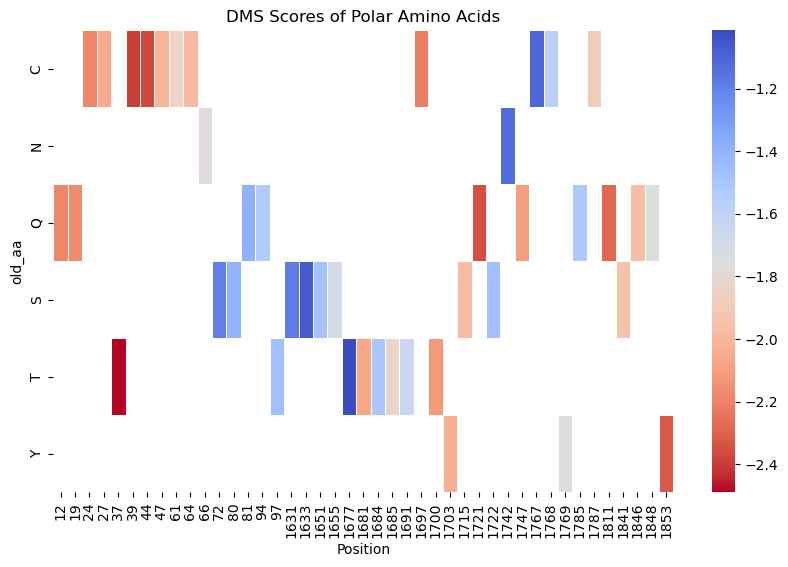

In [137]:
# List of polar amino acids
polar_amino_acids = ['S', 'T', 'Y', 'C', 'N', 'Q']

# Filter the dataset for polar amino acids
polar_data = copy_raw[copy_raw['old_aa'].isin(polar_amino_acids)][['old_aa', 'position', 'DMS_score']]

# Create a pivot table with 'old_aa' as index, 'position' as columns, and 'DMS_score' as values
pivot_table = polar_data.pivot_table(index='old_aa', columns='position', values='DMS_score', aggfunc='mean')

# Set the figure size
plt.figure(figsize=(10, 6))

# Plot the heatmap
sns.heatmap(pivot_table, cmap='coolwarm_r', annot=False, linewidths=0.5)


# Add labels and title
plt.xlabel('Position')
plt.ylabel('old_aa')
plt.title('DMS Scores of Polar Amino Acids')

# Display the heatmap
plt.show()


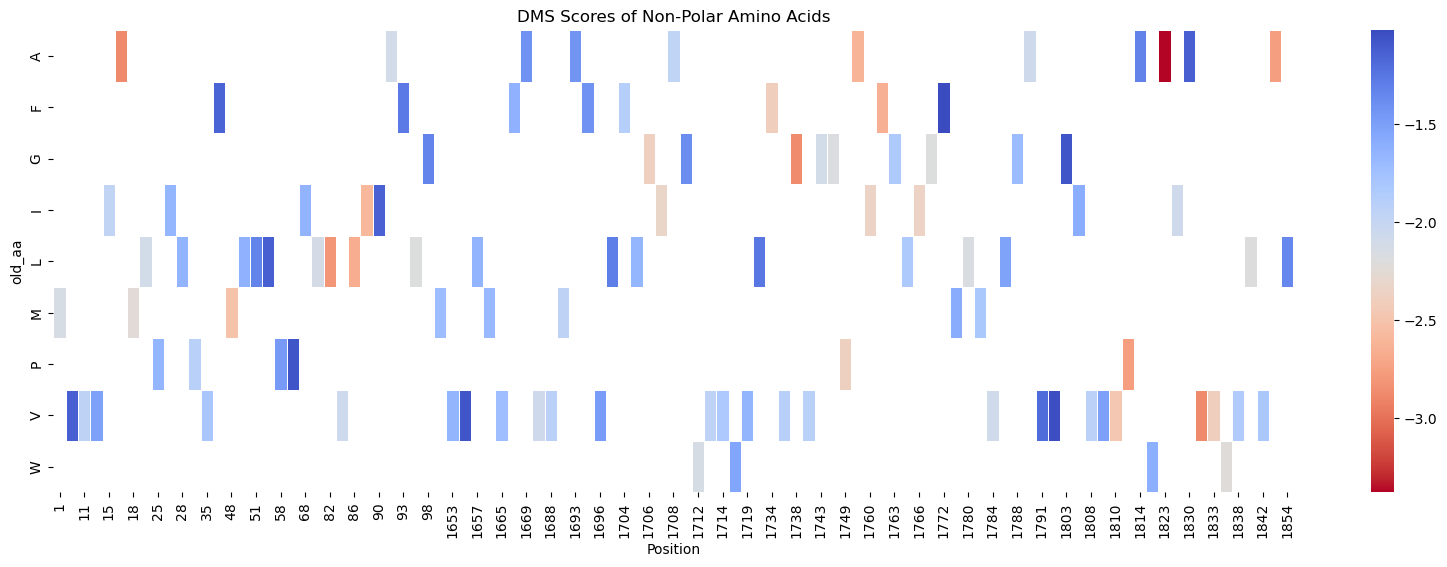

In [48]:
# List of non-polar amino acids
non_polar_amino_acids = ['A', 'V', 'I', 'L', 'M', 'F', 'W', 'G', 'P']

# Filter the dataset for non-polar amino acids
non_polar_data = copy_raw[copy_raw['old_aa'].isin(non_polar_amino_acids)][['old_aa', 'position', 'DMS_score']]

# Create a pivot table with 'old_aa' as index, 'position' as columns, and 'DMS_score' as values
pivot_table = non_polar_data.pivot_table(index='old_aa', columns='position', values='DMS_score', aggfunc='mean')

# Set the figure size
plt.figure(figsize=(20, 6))

# Plot the heatmap
sns.heatmap(pivot_table, cmap='coolwarm_r', annot=False, linewidths=0.5)

# Add labels and title
plt.xlabel('Position')
plt.ylabel('old_aa')
plt.title('DMS Scores of Non-Polar Amino Acids')

# Display the heatmap
plt.show()

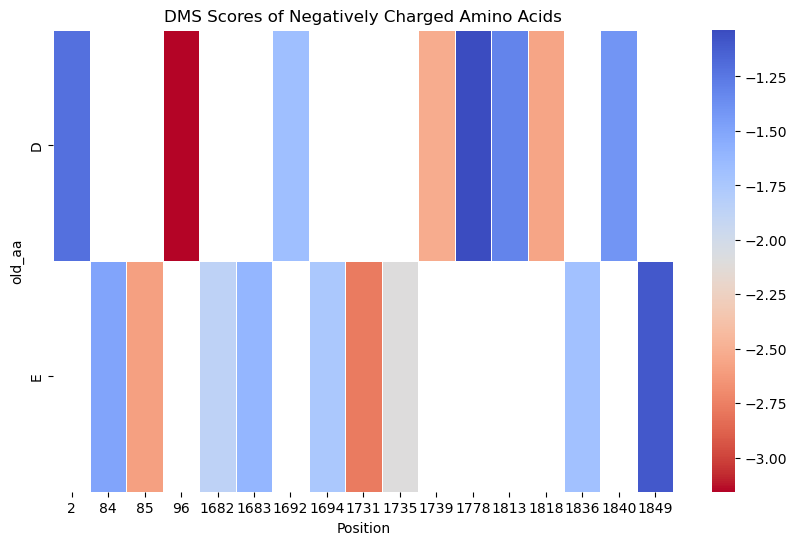

In [49]:
# List of negatively charged amino acids
neg_charged_amino_acids = ['D', 'E']

# Filter the dataset for negatively charged amino acids
neg_charged_data = copy_raw[copy_raw['old_aa'].isin(neg_charged_amino_acids)][['old_aa', 'position', 'DMS_score']]

# Create a pivot table with 'old_aa' as index, 'position' as columns, and 'DMS_score' as values
pivot_table = neg_charged_data.pivot_table(index='old_aa', columns='position', values='DMS_score', aggfunc='mean')

# Set the figure size
plt.figure(figsize=(10, 6))

# Plot the heatmap
sns.heatmap(pivot_table, cmap='coolwarm_r', annot=False, linewidths=0.5)

# Add labels and title
plt.xlabel('Position')
plt.ylabel('old_aa')
plt.title('DMS Scores of Negatively Charged Amino Acids')

# Display the heatmap
plt.show()

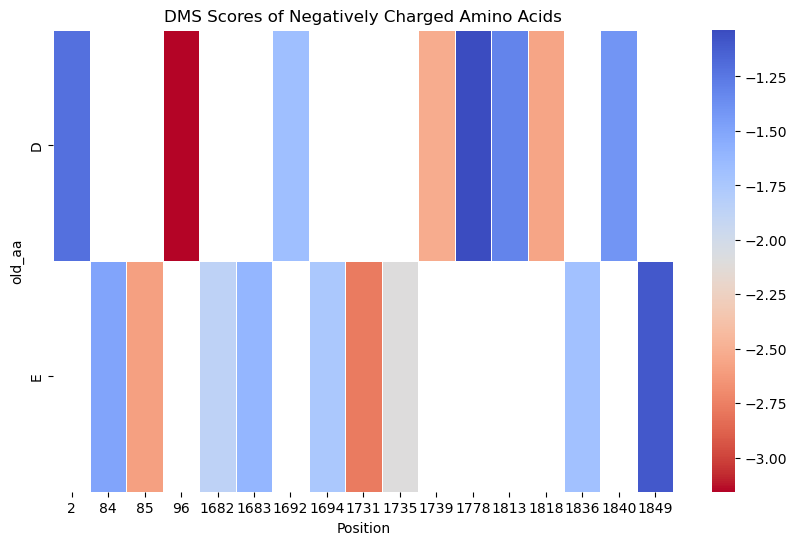

In [50]:
# List of negatively charged amino acids
neg_charged_amino_acids = ['D', 'E']

# Filter the dataset for negatively charged amino acids
neg_charged_data = copy_raw[copy_raw['old_aa'].isin(neg_charged_amino_acids)][['old_aa', 'position', 'DMS_score']]

# Create a pivot table with 'old_aa' as index, 'position' as columns, and 'DMS_score' as values
pivot_table = neg_charged_data.pivot_table(index='old_aa', columns='position', values='DMS_score', aggfunc='mean')

# Set the figure size
plt.figure(figsize=(10, 6))

# Plot the heatmap
sns.heatmap(pivot_table, cmap='coolwarm_r', annot=False, linewidths=0.5)

# Add labels and title
plt.xlabel('Position')
plt.ylabel('old_aa')
plt.title('DMS Scores of Negatively Charged Amino Acids')

# Display the heatmap
plt.show()

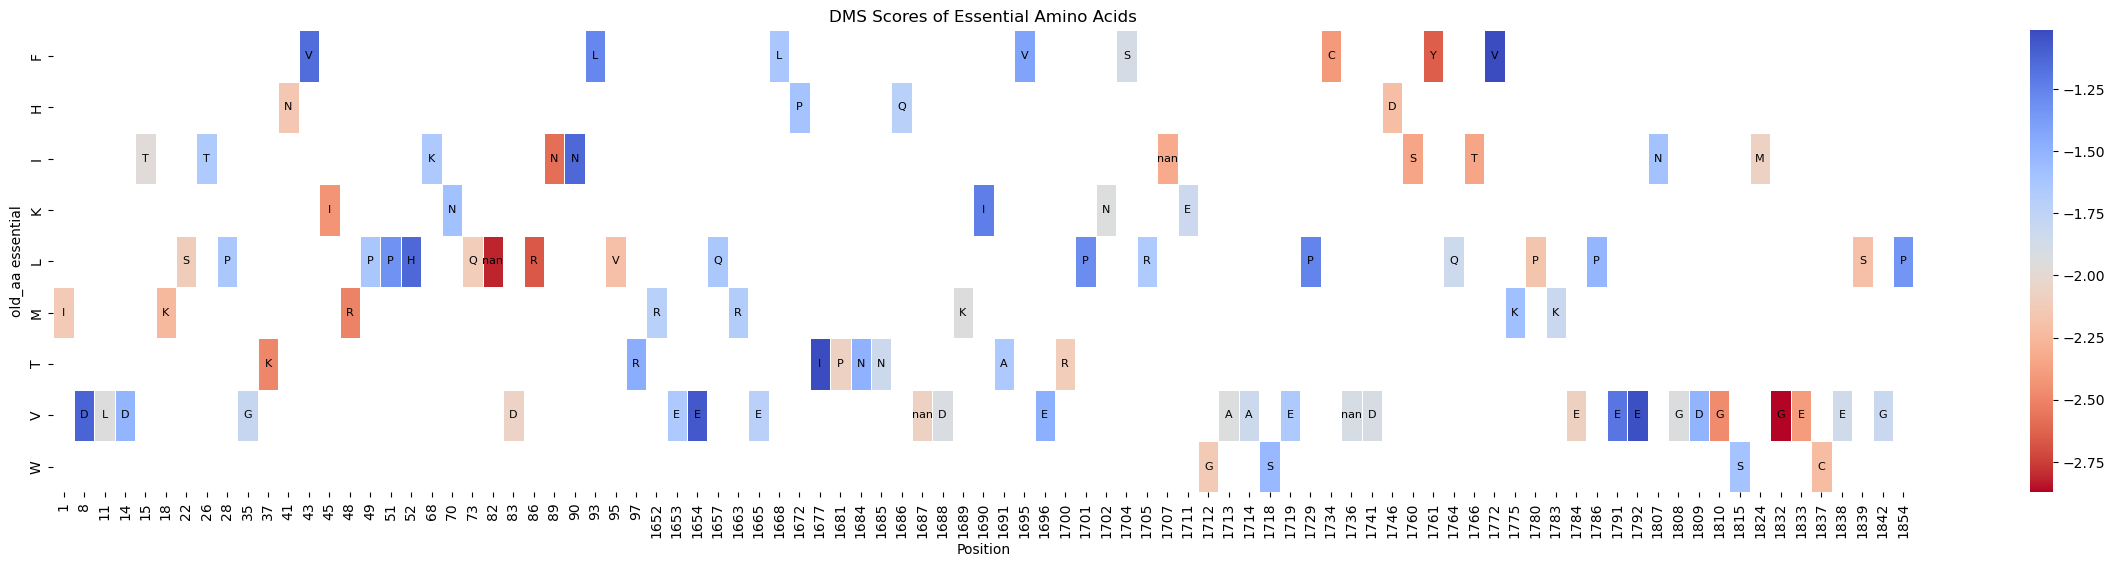

In [138]:
# List of essential amino acids
essential_amino_acids = ['H','I','L','K','M','F','T','W','V']

# Filter the dataset for essential amino acids
essential_data = copy_raw[copy_raw['old_aa'].isin(essential_amino_acids)][['old_aa', 'position', 'DMS_score', 'new_aa']]

# Create a pivot table with 'old_aa' as index, 'position' as columns, and 'DMS_score' as values
pivot_table = essential_data.pivot_table(index='old_aa', columns='position', values='DMS_score', aggfunc='mean')

# Set the figure size
plt.figure(figsize=(30, 6))

# Plot the heatmap
sns.heatmap(pivot_table, cmap='coolwarm_r', annot=False, linewidths=0.5)

# Add annotations for the "new_aa" values
for i in range(len(pivot_table.index)):
    for j in range(len(pivot_table.columns)):
        old_aa = pivot_table.index[i]
        position = pivot_table.columns[j]
        new_aa = essential_data[(essential_data['old_aa'] == old_aa) & (essential_data['position'] == position)]['new_aa'].values
        if len(new_aa) > 0:
            plt.text(j + 0.5, i + 0.5, new_aa[0], ha='center', va='center', fontsize=8)

# Add labels and title
plt.xlabel('Position')
plt.ylabel('old_aa essential')
plt.title('DMS Scores of Essential Amino Acids')

# Display the heatmap
plt.show()


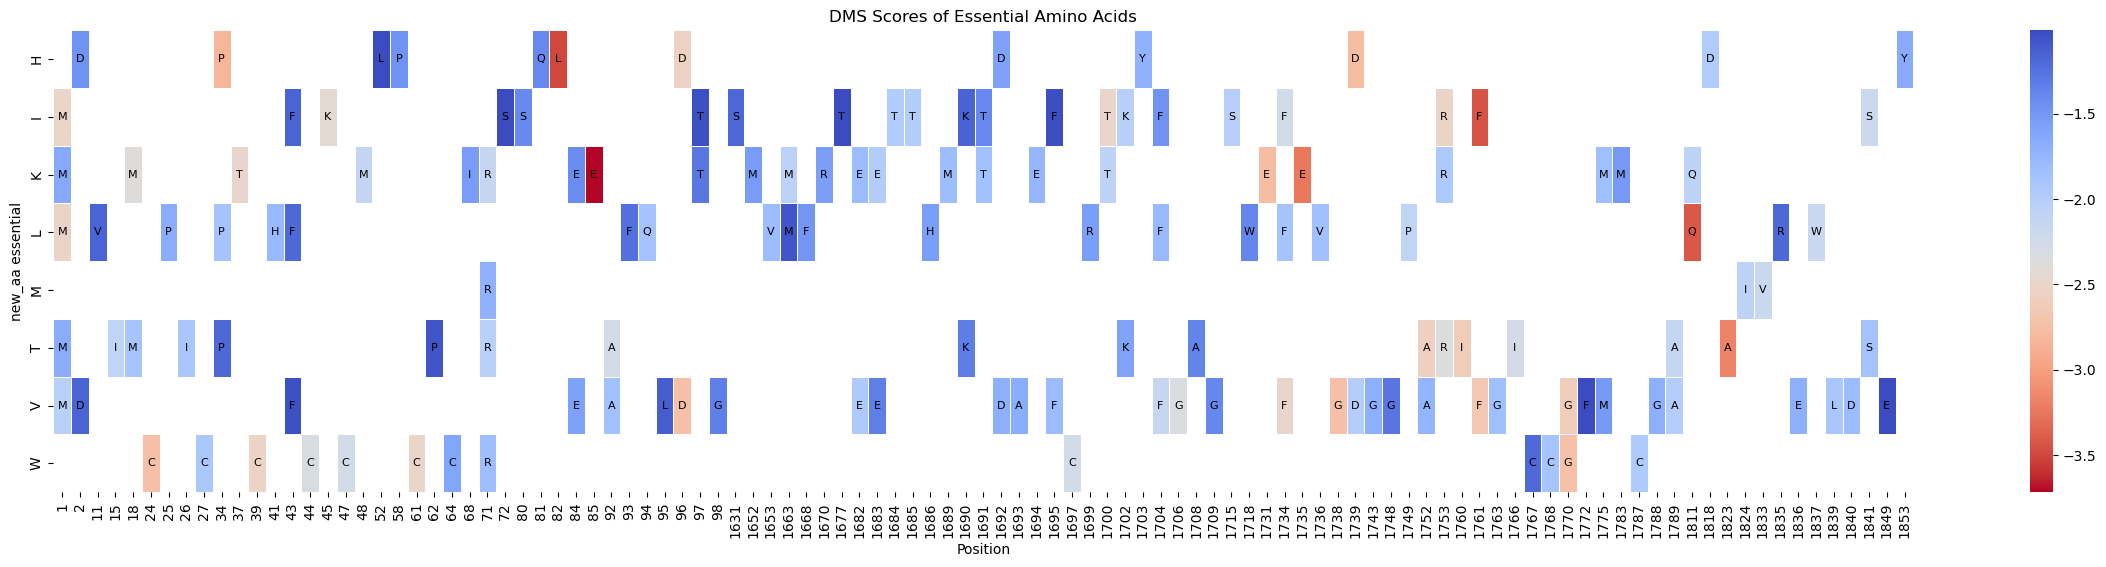

In [139]:
# List of essential amino acids
essential_amino_acids = ['H', 'I', 'L', 'K', 'M', 'F', 'T', 'W', 'V']

# Filter the dataset for essential amino acids
essential_data = copy_raw[copy_raw['new_aa'].isin(essential_amino_acids)][['new_aa', 'position', 'DMS_score', 'old_aa']]

# Create a pivot table with 'new_aa' as index, 'position' as columns, and 'DMS_score' as values
pivot_table = essential_data.pivot_table(index='new_aa', columns='position', values='DMS_score', aggfunc='mean')

# Set the figure size
plt.figure(figsize=(30, 6))

# Plot the heatmap
sns.heatmap(pivot_table, cmap='coolwarm_r', annot=False, linewidths=0.5)

# Add annotations for the "old_aa" values
for i in range(len(pivot_table.index)):
    for j in range(len(pivot_table.columns)):
        new_aa = pivot_table.index[i]
        position = pivot_table.columns[j]
        old_aa = essential_data[(essential_data['new_aa'] == new_aa) & (essential_data['position'] == position)]['old_aa'].values
        if len(old_aa) > 0:
            plt.text(j + 0.5, i + 0.5, old_aa[0], ha='center', va='center', fontsize=8)

# Add labels and title
plt.xlabel('Position')
plt.ylabel('new_aa essential')
plt.title('DMS Scores of Essential Amino Acids')

# Display the heatmap
plt.show()


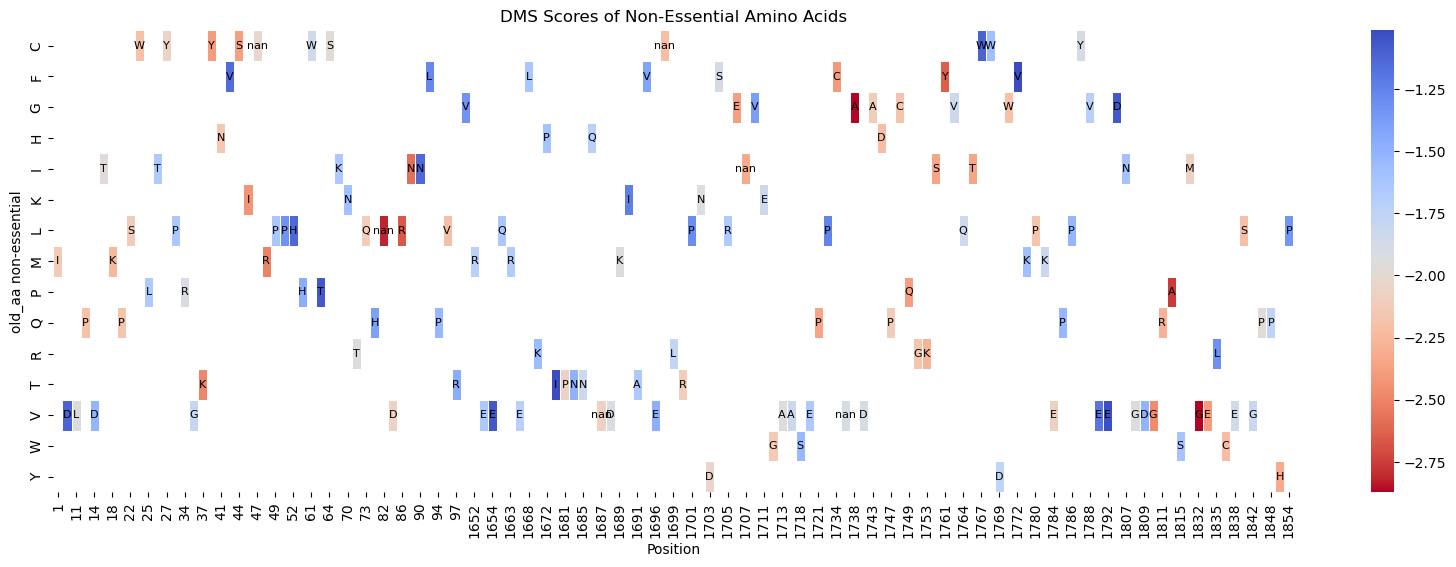

In [140]:
# List of non-essential amino acids
non_essential_amino_acids = ['A', 'D', 'N', 'E', 'S', 'U', 'O']

# Filter the dataset for non-essential amino acids
non_essential_data = copy_raw[~copy_raw['old_aa'].isin(non_essential_amino_acids)][['old_aa', 'position', 'DMS_score', 'new_aa']]

# Create a pivot table with 'old_aa' as index, 'position' as columns, and 'DMS_score' as values
pivot_table = non_essential_data.pivot_table(index='old_aa', columns='position', values='DMS_score', aggfunc='mean')

# Set the figure size
plt.figure(figsize=(20, 6))

# Plot the heatmap
sns.heatmap(pivot_table, cmap='coolwarm_r', annot=False, linewidths=0.5)

# Add annotations for the "new_aa" values
for i in range(len(pivot_table.index)):
    for j in range(len(pivot_table.columns)):
        old_aa = pivot_table.index[i]
        position = pivot_table.columns[j]
        new_aa = non_essential_data[(non_essential_data['old_aa'] == old_aa) & (non_essential_data['position'] == position)]['new_aa'].values
        if len(new_aa) > 0:
            plt.text(j + 0.5, i + 0.5, new_aa[0], ha='center', va='center', fontsize=8)

# Add labels and title
plt.xlabel('Position')
plt.ylabel('old_aa non-essential')
plt.title('DMS Scores of Non-Essential Amino Acids')

# Display the heatmap
plt.show()


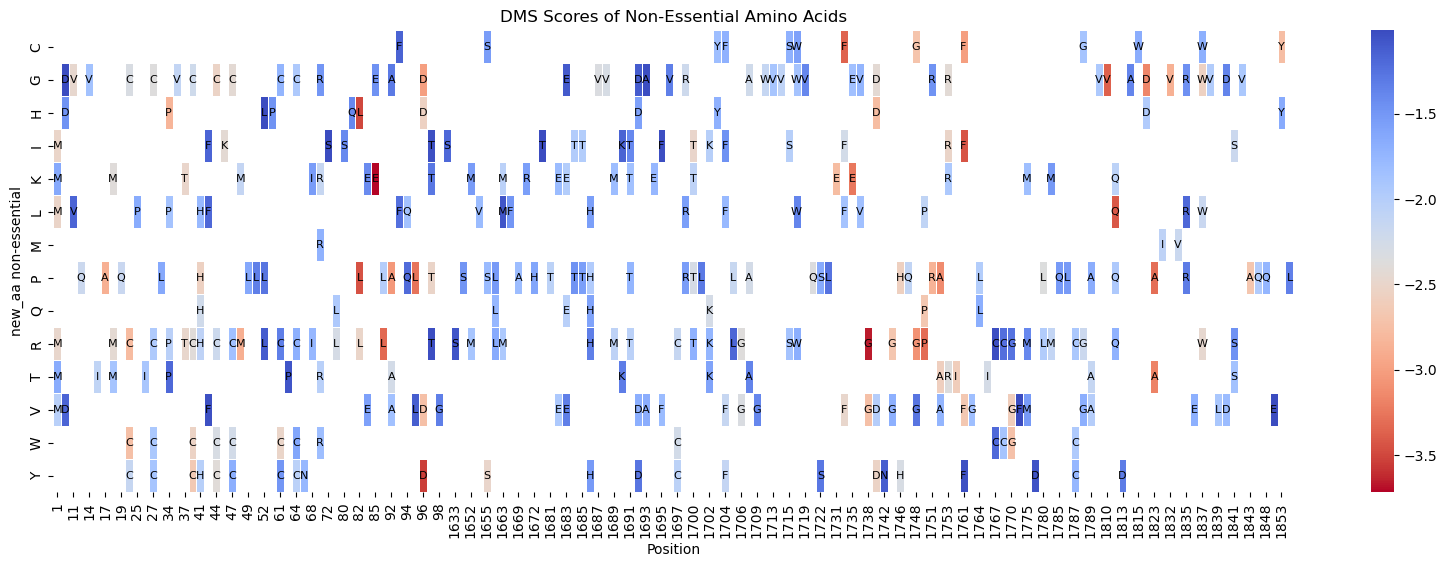

In [141]:
# List of non-essential amino acids
non_essential_amino_acids = ['A', 'D', 'N', 'E', 'S', 'U', 'O']

# Filter the dataset for non-essential amino acids
non_essential_data = copy_raw[~copy_raw['new_aa'].isin(non_essential_amino_acids)][['new_aa', 'position', 'DMS_score', 'old_aa']]

# Create a pivot table with 'new_aa' as index, 'position' as columns, and 'DMS_score' as values
pivot_table = non_essential_data.pivot_table(index='new_aa', columns='position', values='DMS_score', aggfunc='mean')

# Set the figure size
plt.figure(figsize=(20, 6))

# Plot the heatmap
sns.heatmap(pivot_table, cmap='coolwarm_r', annot=False, linewidths=0.5)

# Add annotations for the "old_aa" values
for i in range(len(pivot_table.index)):
    for j in range(len(pivot_table.columns)):
        new_aa = pivot_table.index[i]
        position = pivot_table.columns[j]
        old_aa = non_essential_data[(non_essential_data['new_aa'] == new_aa) & (non_essential_data['position'] == position)]['old_aa'].values
        if len(old_aa) > 0:
            plt.text(j + 0.5, i + 0.5, old_aa[0], ha='center', va='center', fontsize=8)

# Add labels and title
plt.xlabel('Position')
plt.ylabel('new_aa non-essential')
plt.title('DMS Scores of Non-Essential Amino Acids')

# Display the heatmap
plt.show()


In [55]:
copy_raw

,mutant,mutated_sequence,DMS_score,DMS_score_bin,position,DMS_score_normalized,dms_score_normalized,new_aa,old_aa
0,M1I,IDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-2.502128,0,1,0.242003,0.242003,I,M
1,M1V,VDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-2.025645,0,1,0.336824,0.336824,V,M
2,M1T,TDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-1.656569,0,1,0.410270,0.410270,T,M
3,M1R,RDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-2.481580,0,1,0.246092,0.246092,R,M
4,M1L,LDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-2.516529,0,1,0.239137,0.239137,L,M
...,...,...,...,...,...,...,...,...,...
1822,Y1853D,MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-3.351372,0,1853,0.073003,0.073003,D,Y
1823,Y1853C,MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-2.763438,0,1853,0.190002,0.190002,C,Y
1824,Y1853S,MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-1.698237,0,1853,0.401978,0.401978,S,Y
1825,Y1853N,MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-2.167195,0,1853,0.308655,0.308655,N,Y


In [56]:
copy_phosphorylation = copy_raw.loc[copy_raw['old_aa'].isin(['S', 'T', 'Y'])].copy()


In [57]:
 copy_phosphorylation

,mutant,mutated_sequence,DMS_score,DMS_score_bin,position,DMS_score_normalized,dms_score_normalized,new_aa,old_aa
211,T37K,MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSKKCDHIFCKF...,-2.493523,0,37,0.243715,0.243715,K,T
213,T37R,MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSRKCDHIFCKF...,-2.485527,0,37,0.245307,0.245307,R,T
417,S72N,MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-1.375164,0,72,0.466269,0.466269,N,S
418,S72I,MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-1.013874,0,72,0.538166,0.538166,I,S
461,S80I,MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-1.408656,0,80,0.459605,0.459605,I,S
561,T97R,MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-1.023824,0,97,0.536186,0.536186,R,T
562,T97P,MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-2.517171,0,97,0.239010,0.239010,P,T
563,T97K,MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-1.279120,0,97,0.485382,0.485382,K,T
564,T97I,MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-1.040134,0,97,0.532941,0.532941,I,T
579,S1631I,MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-1.180832,0,1631,0.504942,0.504942,I,S


/var/folders/px/t7c4vv9555gc6_5d200h7fmr0000gn/T/ipykernel_90287/908054992.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  heatmap_data = filtered_data.pivot("new_aa", "position", "DMS_score")
/var/folders/px/t7c4vv9555gc6_5d200h7fmr0000gn/T/ipykernel_90287/908054992.py:8: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  old_aa_data = filtered_data.pivot("new_aa", "position", "old_aa")


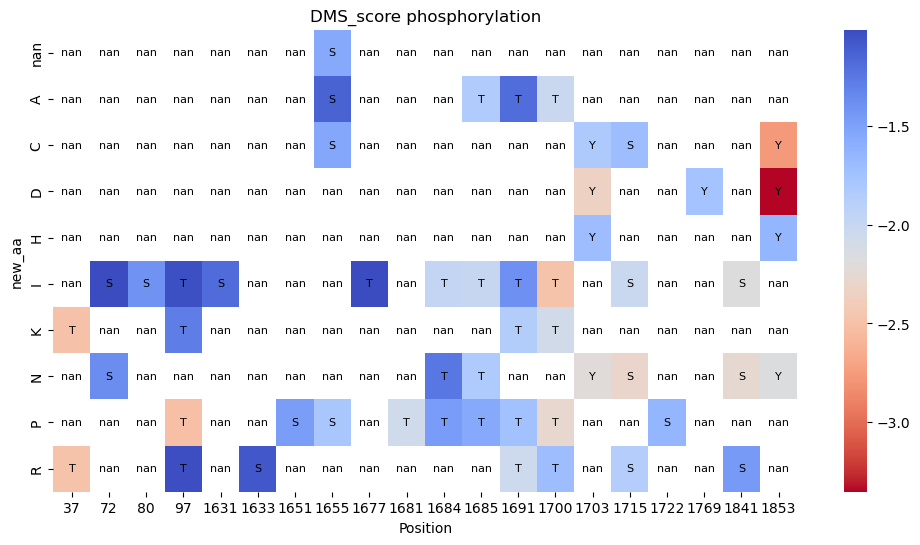

In [142]:
# Filter the dataset for rows excluding 'S', 'T', or 'Y' in the "new_aa" column
filtered_data = copy_phosphorylation.loc[~copy_phosphorylation['new_aa'].isin(['S', 'T', 'Y'])]

# Reshape the filtered data for heatmap visualization
heatmap_data = filtered_data.pivot("new_aa", "position", "DMS_score")

# Create a separate dataframe to store the "old_aa" values
old_aa_data = filtered_data.pivot("new_aa", "position", "old_aa")

# Create the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap="coolwarm_r", annot=False, cbar=True)
plt.title("DMS_score phosphorylation")
plt.xlabel("Position")
plt.ylabel("new_aa")

# Add annotations for the "old_aa" values
for i in range(len(heatmap_data.index)):
    for j in range(len(heatmap_data.columns)):
        plt.text(j + 0.5, i + 0.5, old_aa_data.iloc[i, j], ha='center', va='center', fontsize=8)

plt.show()

In [60]:
copy_new_phosphorylation = copy_raw[copy_raw['new_aa'].isin(['S', 'T', 'Y'])].copy()


In [61]:
copy_raw

,mutant,mutated_sequence,DMS_score,DMS_score_bin,position,DMS_score_normalized,dms_score_normalized,new_aa,old_aa
0,M1I,IDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-2.502128,0,1,0.242003,0.242003,I,M
1,M1V,VDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-2.025645,0,1,0.336824,0.336824,V,M
2,M1T,TDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-1.656569,0,1,0.410270,0.410270,T,M
3,M1R,RDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-2.481580,0,1,0.246092,0.246092,R,M
4,M1L,LDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-2.516529,0,1,0.239137,0.239137,L,M
...,...,...,...,...,...,...,...,...,...
1822,Y1853D,MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-3.351372,0,1853,0.073003,0.073003,D,Y
1823,Y1853C,MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-2.763438,0,1853,0.190002,0.190002,C,Y
1824,Y1853S,MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-1.698237,0,1853,0.401978,0.401978,S,Y
1825,Y1853N,MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-2.167195,0,1853,0.308655,0.308655,N,Y


In [62]:
copy_new_phosphorylation

,mutant,mutated_sequence,DMS_score,DMS_score_bin,position,DMS_score_normalized,dms_score_normalized,new_aa,old_aa
2,M1T,TDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-1.656569,0,1,0.410270,0.410270,T,M
84,I15T,MDLSALRVEEVQNVTNAMQKILECPICLELIKEPVSTKCDHIFCKF...,-2.096973,0,15,0.322629,0.322629,T,I
88,I15S,MDLSALRVEEVQNVSNAMQKILECPICLELIKEPVSTKCDHIFCKF...,-1.834711,0,15,0.374819,0.374819,S,I
108,M18T,MDLSALRVEEVQNVINATQKILECPICLELIKEPVSTKCDHIFCKF...,-1.887430,0,18,0.364328,0.364328,T,M
128,L22S,MDLSALRVEEVQNVINAMQKISECPICLELIKEPVSTKCDHIFCKF...,-2.106676,0,22,0.320698,0.320698,S,L
...,...,...,...,...,...,...,...,...,...
1660,A1823S,MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-3.642831,0,1823,0.015003,0.015003,S,A
1732,W1837S,MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-2.224529,0,1837,0.297246,0.297246,S,W
1741,L1839S,MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-2.491444,0,1839,0.244129,0.244129,S,L
1750,S1841T,MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-1.863429,0,1841,0.369104,0.369104,T,S


/var/folders/px/t7c4vv9555gc6_5d200h7fmr0000gn/T/ipykernel_90287/2442374556.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  heatmap_data = filtered_data.pivot("new_aa", "position", "DMS_score")
/var/folders/px/t7c4vv9555gc6_5d200h7fmr0000gn/T/ipykernel_90287/2442374556.py:8: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  old_aa_data = filtered_data.pivot("new_aa", "position", "old_aa")


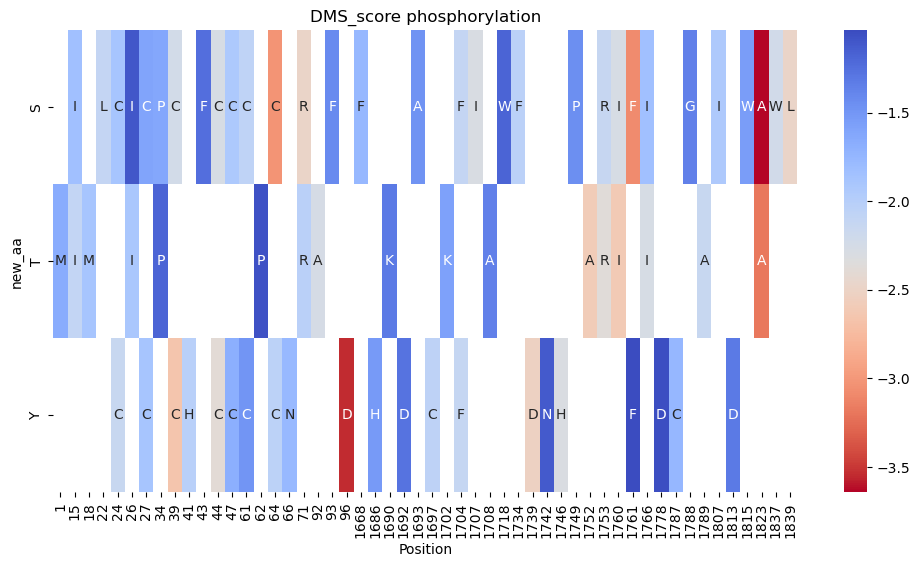

In [143]:
# Filter the dataset for rows that have any value except 'S', 'T', or 'Y' in the "old_aa" column
filtered_data = copy_new_phosphorylation[~copy_new_phosphorylation['old_aa'].isin(['S', 'T', 'Y'])]

# Reshape the filtered data for heatmap visualization
heatmap_data = filtered_data.pivot("new_aa", "position", "DMS_score")

# Create a separate dataframe to store the "old_aa" values
old_aa_data = filtered_data.pivot("new_aa", "position", "old_aa")

# Create the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap="coolwarm_r", annot=old_aa_data, fmt="", cbar=True)
plt.title("DMS_score phosphorylation")
plt.xlabel("Position")
plt.ylabel("new_aa")

plt.show()

In [145]:
copy_new_lys = copy_raw[copy_raw['new_aa'].isin(['K'])].copy()

In [146]:
copy_new_lys

,mutant,mutated_sequence,DMS_score,DMS_score_bin,position,DMS_score_normalized,dms_score_normalized,new_aa,old_aa
5,M1K,KDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-1.636700,0,1,0.414224,0.414224,K,M
105,M18K,MDLSALRVEEVQNVINAKQKILECPICLELIKEPVSTKCDHIFCKF...,-2.390481,0,18,0.264221,0.264221,K,M
211,T37K,MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSKKCDHIFCKF...,-2.493523,0,37,0.243715,0.243715,K,T
283,M48K,MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-2.124893,0,48,0.317073,0.317073,K,M
392,I68K,MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-1.535420,0,68,0.434378,0.434378,K,I
412,R71K,MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-2.149339,0,71,0.312208,0.312208,K,R
485,E84K,MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-1.415194,0,84,0.458304,0.458304,K,E
490,E85K,MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-3.718221,0,85,0.000000,0.000000,K,E
563,T97K,MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-1.279120,0,97,0.485382,0.485382,K,T
700,M1652K,MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-1.532355,0,1652,0.434988,0.434988,K,M


/var/folders/px/t7c4vv9555gc6_5d200h7fmr0000gn/T/ipykernel_90287/1979893177.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  heatmap_data = filtered_data.pivot("new_aa", "position", "DMS_score")
/var/folders/px/t7c4vv9555gc6_5d200h7fmr0000gn/T/ipykernel_90287/1979893177.py:8: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  old_aa_data = filtered_data.pivot("new_aa", "position", "old_aa")


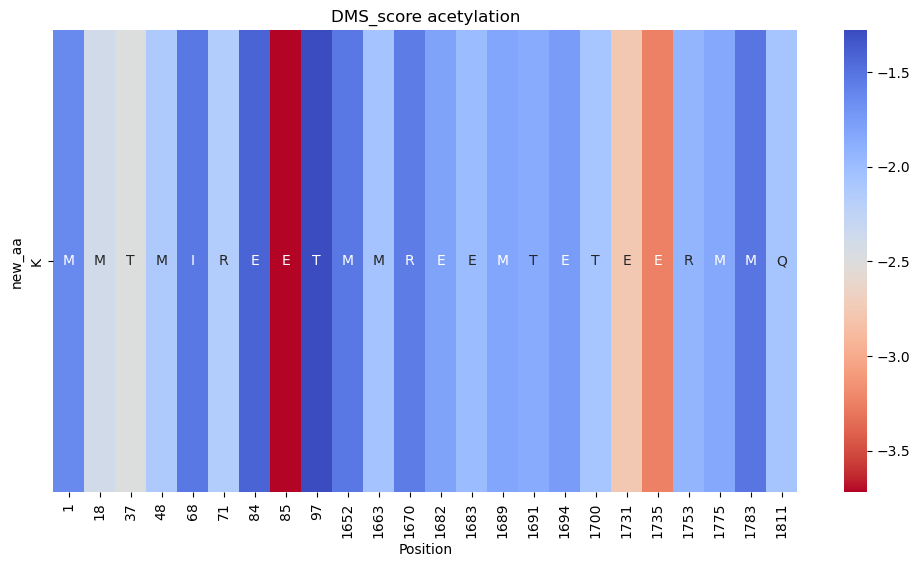

In [148]:
# Filter the dataset for rows that have 'K' in the "new_aa" column
filtered_data = copy_new_lys[copy_new_lys['new_aa'] == 'K']

# Reshape the filtered data for heatmap visualization
heatmap_data = filtered_data.pivot("new_aa", "position", "DMS_score")

# Create a separate dataframe to store the "old_aa" values
old_aa_data = filtered_data.pivot("new_aa", "position", "old_aa")

# Create the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap="coolwarm_r", annot=old_aa_data, fmt="", cbar=True)
plt.title("DMS_score acetylation")
plt.xlabel("Position")
plt.ylabel("new_aa")

plt.show()

In [104]:
# Create a copy of the dataset with rows that have 'K' in the "old_aa" column
copy_old_lys = copy_raw[copy_raw['old_aa'].str.contains('K')].copy()



In [69]:
copy_old_lys

,mutant,mutated_sequence,DMS_score,DMS_score_bin,position,DMS_score_normalized,dms_score_normalized,new_aa,old_aa
260,K45I,MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCIF...,-2.435806,0,45,0.255201,0.255201,I,K
404,K70N,MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-1.590835,0,70,0.423351,0.423351,N,K
907,K1690I,MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-1.155802,0,1690,0.509923,0.509923,I,K
908,K1690T,MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-1.319579,0,1690,0.477331,0.477331,T,K
972,K1702N,MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-1.975027,0,1702,0.346896,0.346896,N,K
973,K1702Q,MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-2.278785,0,1702,0.286448,0.286448,Q,K
974,K1702R,MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-1.741090,0,1702,0.393450,0.393450,R,K
975,K1702T,MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-1.581271,0,1702,0.425254,0.425254,T,K
976,K1702E,MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-2.020250,0,1702,0.337897,0.337897,E,K
977,K1702I,MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-2.017579,0,1702,0.338429,0.338429,I,K


/var/folders/px/t7c4vv9555gc6_5d200h7fmr0000gn/T/ipykernel_90287/1246131928.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  heatmap_data = filtered_data.pivot("new_aa", "position", "DMS_score")
/var/folders/px/t7c4vv9555gc6_5d200h7fmr0000gn/T/ipykernel_90287/1246131928.py:8: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  old_aa_data = filtered_data.pivot("new_aa", "position", "old_aa")


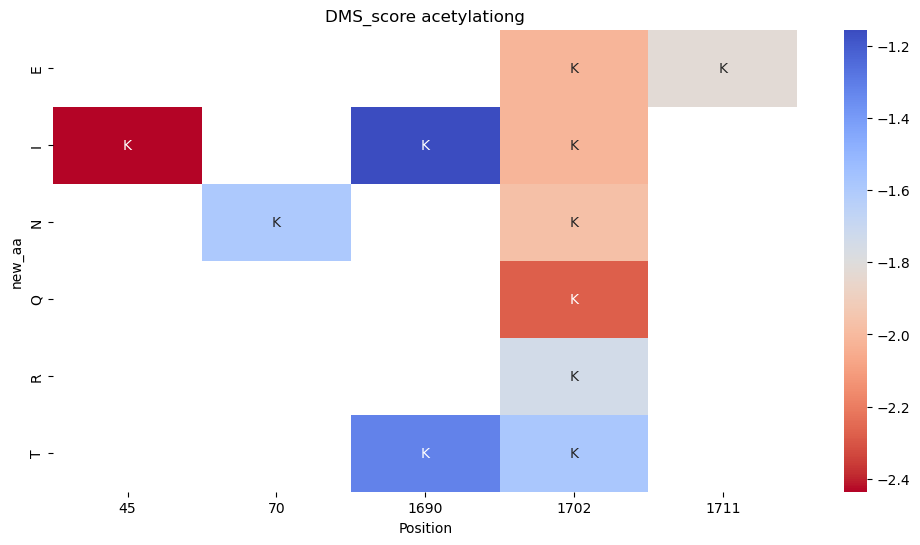

In [149]:
# Filter the dataset for rows that have 'K' in the "old_aa" column
filtered_data = copy_old_lys[copy_old_lys['old_aa'] == 'K']

# Reshape the filtered data for heatmap visualization
heatmap_data = filtered_data.pivot("new_aa", "position", "DMS_score")

# Create a separate dataframe to store the "old_aa" values
old_aa_data = filtered_data.pivot("new_aa", "position", "old_aa")

# Create the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap="coolwarm_r", annot=old_aa_data, fmt="", cbar=True)
plt.title("DMS_score acetylationg")
plt.xlabel("Position")
plt.ylabel("new_aa")

plt.show()



In [71]:
copy_raw


,mutant,mutated_sequence,DMS_score,DMS_score_bin,position,DMS_score_normalized,dms_score_normalized,new_aa,old_aa
0,M1I,IDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-2.502128,0,1,0.242003,0.242003,I,M
1,M1V,VDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-2.025645,0,1,0.336824,0.336824,V,M
2,M1T,TDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-1.656569,0,1,0.410270,0.410270,T,M
3,M1R,RDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-2.481580,0,1,0.246092,0.246092,R,M
4,M1L,LDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-2.516529,0,1,0.239137,0.239137,L,M
...,...,...,...,...,...,...,...,...,...
1822,Y1853D,MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-3.351372,0,1853,0.073003,0.073003,D,Y
1823,Y1853C,MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-2.763438,0,1853,0.190002,0.190002,C,Y
1824,Y1853S,MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-1.698237,0,1853,0.401978,0.401978,S,Y
1825,Y1853N,MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-2.167195,0,1853,0.308655,0.308655,N,Y


In [72]:
copy_old_glyc = copy_raw[copy_raw['old_aa'].isin(['S', 'T', 'N'])].copy()

In [73]:
copy_old_glyc

,mutant,mutated_sequence,DMS_score,DMS_score_bin,position,DMS_score_normalized,dms_score_normalized,new_aa,old_aa
211,T37K,MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSKKCDHIFCKF...,-2.493523,0,37,0.243715,0.243715,K,T
213,T37R,MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSRKCDHIFCKF...,-2.485527,0,37,0.245307,0.245307,R,T
379,N66Y,MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-1.769773,0,66,0.387742,0.387742,Y,N
417,S72N,MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-1.375164,0,72,0.466269,0.466269,N,S
418,S72I,MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-1.013874,0,72,0.538166,0.538166,I,S
461,S80I,MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-1.408656,0,80,0.459605,0.459605,I,S
561,T97R,MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-1.023824,0,97,0.536186,0.536186,R,T
562,T97P,MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-2.517171,0,97,0.239010,0.239010,P,T
563,T97K,MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-1.279120,0,97,0.485382,0.485382,K,T
564,T97I,MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-1.040134,0,97,0.532941,0.532941,I,T


/var/folders/px/t7c4vv9555gc6_5d200h7fmr0000gn/T/ipykernel_90287/936683186.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  pivot_table = copy_old_glyc.pivot('new_aa', 'position', 'DMS_score')


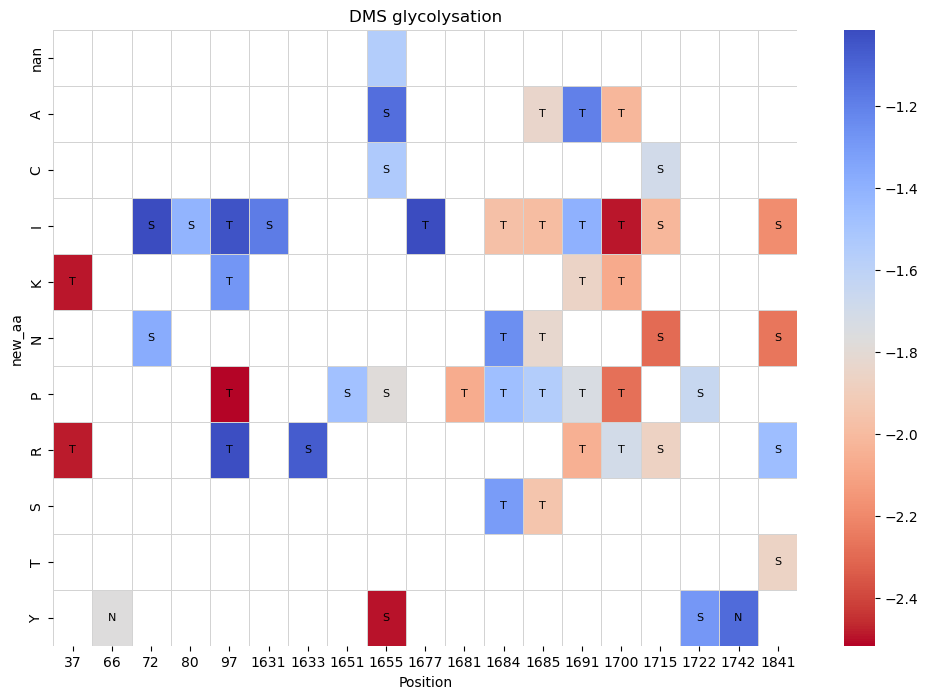

In [151]:
# Create a pivot table for DMS scores
pivot_table = copy_old_glyc.pivot('new_aa', 'position', 'DMS_score')

# Generate the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, cmap='coolwarm_r', linewidths=0.5, linecolor='lightgray')

# Add annotations for the "old_aa" values
for i in range(len(pivot_table.index)):
    for j in range(len(pivot_table.columns)):
        mask = (copy_old_glyc['new_aa'] == pivot_table.index[i]) & (copy_old_glyc['position'] == pivot_table.columns[j])
        if mask.any():
            plt.text(j + 0.5, i + 0.5, copy_old_glyc.loc[mask, 'old_aa'].values[0],
                     ha='center', va='center', fontsize=8)

# Set plot title and axis labels
plt.title('DMS glycolysation')
plt.xlabel('Position')
plt.ylabel('new_aa')

# Display the heatmap
plt.show()



In [76]:
filtered_data = copy_old_glyc[~copy_old_glyc['old_aa'].isin(['S', 'T', 'N'])]


In [77]:
copy_new_glyc = copy_raw[copy_raw['new_aa'].isin(['S', 'T', 'N'])].copy()

In [78]:
copy_new_glyc

,mutant,mutated_sequence,DMS_score,DMS_score_bin,position,DMS_score_normalized,dms_score_normalized,new_aa,old_aa
2,M1T,TDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-1.656569,0,1,0.410270,0.410270,T,M
84,I15T,MDLSALRVEEVQNVTNAMQKILECPICLELIKEPVSTKCDHIFCKF...,-2.096973,0,15,0.322629,0.322629,T,I
88,I15S,MDLSALRVEEVQNVSNAMQKILECPICLELIKEPVSTKCDHIFCKF...,-1.834711,0,15,0.374819,0.374819,S,I
89,I15N,MDLSALRVEEVQNVNNAMQKILECPICLELIKEPVSTKCDHIFCKF...,-2.633053,0,15,0.215949,0.215949,N,I
108,M18T,MDLSALRVEEVQNVINATQKILECPICLELIKEPVSTKCDHIFCKF...,-1.887430,0,18,0.364328,0.364328,T,M
...,...,...,...,...,...,...,...,...,...
1741,L1839S,MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-2.491444,0,1839,0.244129,0.244129,S,L
1750,S1841T,MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-1.863429,0,1841,0.369104,0.369104,T,S
1752,S1841N,MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-2.262144,0,1841,0.289760,0.289760,N,S
1824,Y1853S,MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-1.698237,0,1853,0.401978,0.401978,S,Y


/var/folders/px/t7c4vv9555gc6_5d200h7fmr0000gn/T/ipykernel_90287/763584442.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  pivot_table = copy_new_glyc.pivot('new_aa', 'position', 'DMS_score')


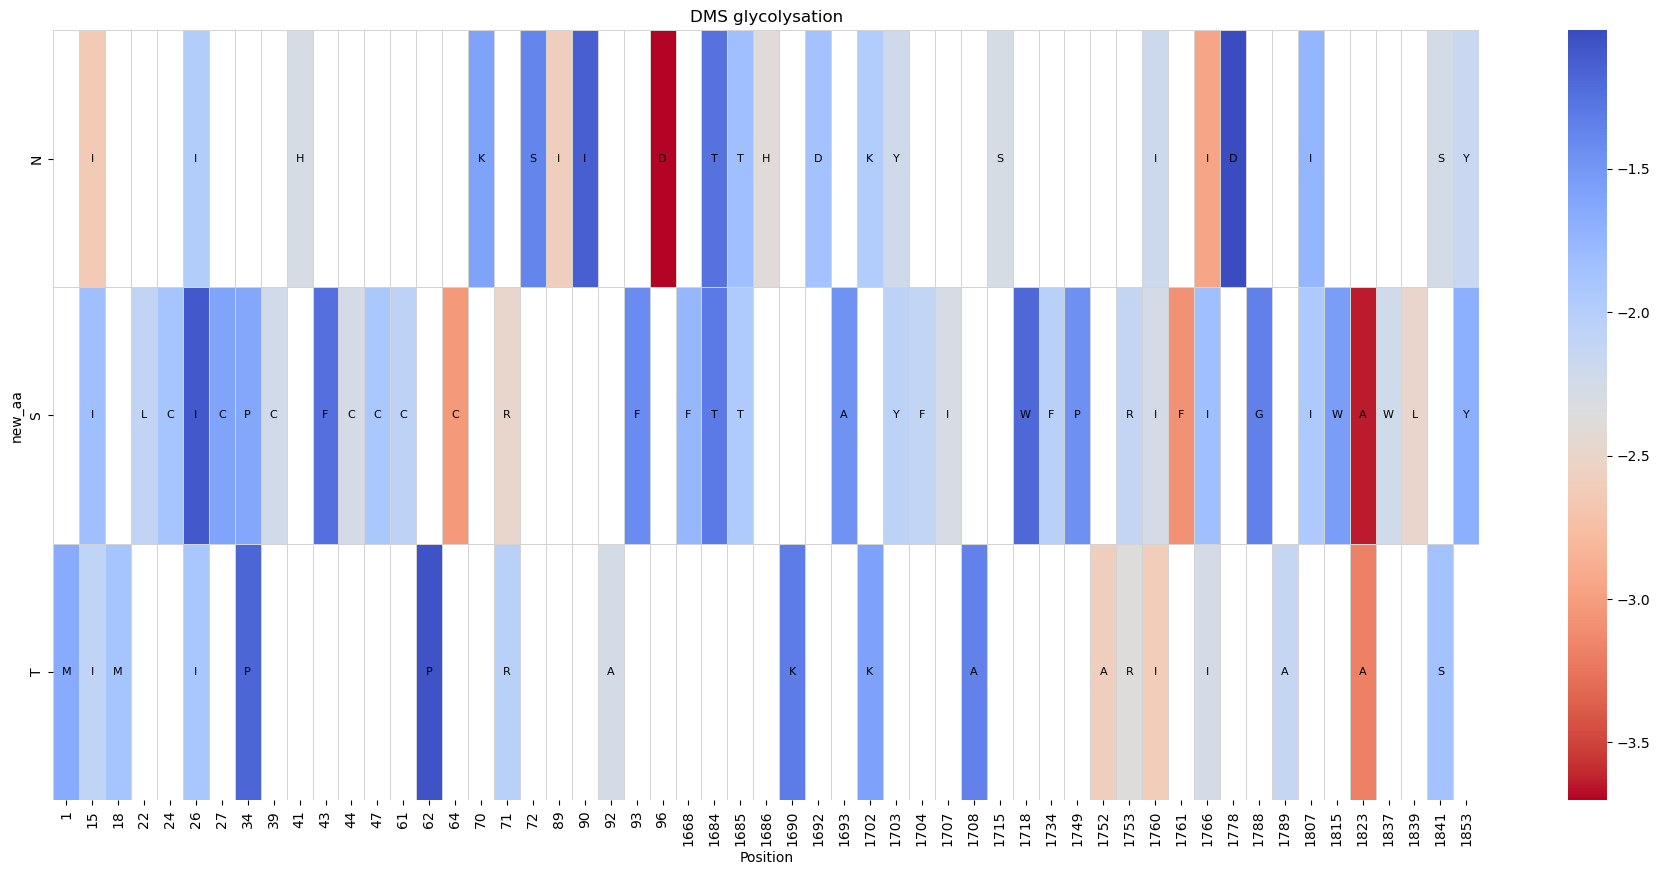

In [152]:
# Create a pivot table for DMS scores
pivot_table = copy_new_glyc.pivot('new_aa', 'position', 'DMS_score')

# Generate the heatmap
plt.figure(figsize=(23, 10))
sns.heatmap(pivot_table, cmap='coolwarm_r', linewidths=0.5, linecolor='lightgray')

# Add annotations for the "old_aa" values
for i in range(len(pivot_table.index)):
    for j in range(len(pivot_table.columns)):
        mask = (copy_new_glyc['new_aa'] == pivot_table.index[i]) & (copy_new_glyc['position'] == pivot_table.columns[j])
        if mask.any():
            plt.text(j + 0.5, i + 0.5, copy_new_glyc.loc[mask, 'old_aa'].values[0],
                     ha='center', va='center', fontsize=8)

# Set plot title and axis labels
plt.title('DMS glycolysation')
plt.xlabel('Position')
plt.ylabel('new_aa')

# Display the heatmap
plt.show()


In [80]:
data_raw

,mutant,mutated_sequence,DMS_score,DMS_score_bin,position,DMS_score_normalized,dms_score_normalized,new_aa,old_aa
0,M1I,IDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-2.502128,0,1,0.242003,0.242003,I,M
1,M1V,VDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-2.025645,0,1,0.336824,0.336824,V,M
2,M1T,TDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-1.656569,0,1,0.410270,0.410270,T,M
3,M1R,RDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-2.481580,0,1,0.246092,0.246092,R,M
4,M1L,LDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-2.516529,0,1,0.239137,0.239137,L,M
...,...,...,...,...,...,...,...,...,...
1832,I1855R,MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-0.464328,1,1855,0.647526,0.647526,R,I
1833,I1855M,MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,0.021941,1,1855,0.744294,0.744294,M,I
1834,I1855L,MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,0.233297,1,1855,0.786354,0.786354,L,I
1835,I1855K,MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-0.863844,1,1855,0.568022,0.568022,K,I


In [81]:
data_fit = df[df['DMS_score_bin'] == 1].copy()


In [82]:
data_fit

,mutant,mutated_sequence,DMS_score,DMS_score_bin
6,D2N,MNLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-0.682954,1
7,D2A,MALSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-0.180782,1
8,D2E,MELSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,0.088696,1
10,D2Y,MYLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-0.256095,1
13,L3F,MDFSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-0.341923,1
...,...,...,...,...
1832,I1855R,MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-0.464328,1
1833,I1855M,MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,0.021941,1
1834,I1855L,MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,0.233297,1
1835,I1855K,MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-0.863844,1


In [83]:
data_fit = data_raw[data_raw['DMS_score_bin'] == 1][['mutant', 'mutated_sequence', 'DMS_score', 'DMS_score_bin', 'position', 'DMS_score_normalized', 'dms_score_normalized', 'new_aa', 'old_aa']].copy()


In [84]:
data_fit

,mutant,mutated_sequence,DMS_score,DMS_score_bin,position,DMS_score_normalized,dms_score_normalized,new_aa,old_aa
6,D2N,MNLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-0.682954,1,2,0.604020,0.604020,N,D
7,D2A,MALSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-0.180782,1,2,0.703952,0.703952,A,D
8,D2E,MELSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,0.088696,1,2,0.757578,0.757578,E,D
10,D2Y,MYLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-0.256095,1,2,0.688965,0.688965,Y,D
13,L3F,MDFSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-0.341923,1,3,0.671885,0.671885,NaN,L
...,...,...,...,...,...,...,...,...,...
1832,I1855R,MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-0.464328,1,1855,0.647526,0.647526,R,I
1833,I1855M,MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,0.021941,1,1855,0.744294,0.744294,M,I
1834,I1855L,MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,0.233297,1,1855,0.786354,0.786354,L,I
1835,I1855K,MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-0.863844,1,1855,0.568022,0.568022,K,I


In [85]:
fit_old_glyc = data_fit[data_fit['old_aa'].isin(['S', 'T', 'N'])].copy()


In [86]:
fit_old_glyc

,mutant,mutated_sequence,DMS_score,DMS_score_bin,position,DMS_score_normalized,dms_score_normalized,new_aa,old_aa
17,S4Y,MDLYALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-0.255390,1,4,0.689105,0.689105,Y,S
18,S4A,MDLAALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,0.073691,1,4,0.754592,0.754592,A,S
19,S4P,MDLPALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-0.330096,1,4,0.674239,0.674239,P,S
20,S4F,MDLFALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-0.495239,1,4,0.641375,0.641375,NaN,S
21,S4C,MDLCALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-0.245299,1,4,0.691113,0.691113,C,S
...,...,...,...,...,...,...,...,...,...
1815,T1852N,MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-0.074500,1,1852,0.725102,0.725102,N,T
1816,T1852P,MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-0.067412,1,1852,0.726513,0.726513,P,T
1817,T1852S,MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-0.131134,1,1852,0.713832,0.713832,S,T
1818,T1852A,MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,0.309628,1,1852,0.801544,0.801544,A,T


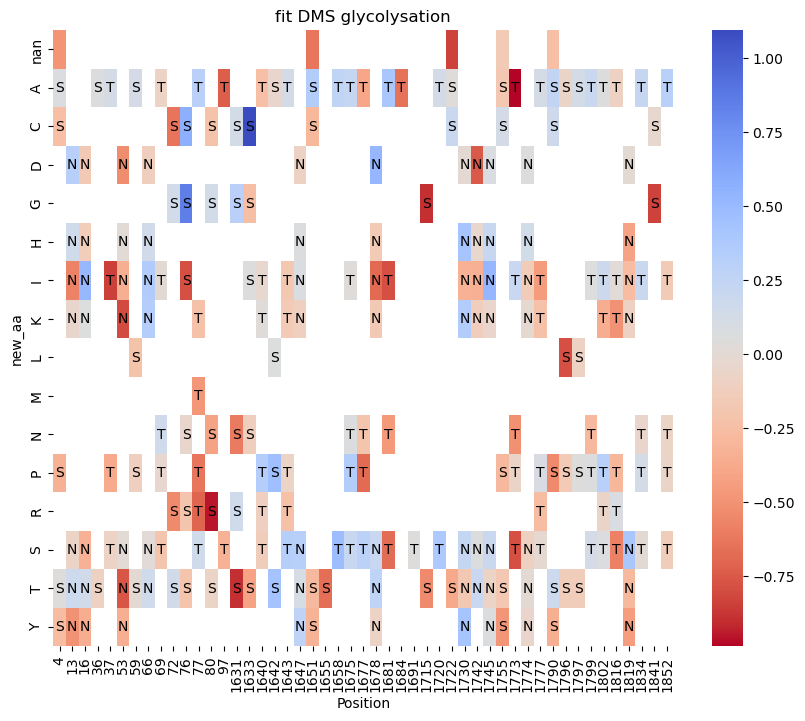

In [154]:
# Create the pivot table for the heatmap
heatmap_data = fit_old_glyc.pivot(index='new_aa', columns='position', values='DMS_score')

# Create the heatmap
plt.figure(figsize=(10, 8))
ax = sns.heatmap(heatmap_data, annot=False, cmap='coolwarm_r', yticklabels=True, xticklabels=True)

# Add annotations for old_aa values
for i in range(len(heatmap_data.index)):
    for j in range(len(heatmap_data.columns)):
        new_aa = heatmap_data.index[i]
        position = heatmap_data.columns[j]
        old_aa = fit_old_glyc.loc[(fit_old_glyc['new_aa'] == new_aa) & (fit_old_glyc['position'] == position), 'old_aa']
        if not old_aa.empty:
            ax.text(j + 0.5, i + 0.5, old_aa.values[0], ha='center', va='center', color='black')

# Set labels and title
plt.xlabel('Position')
plt.ylabel('new_aa')
plt.title('fit DMS glycolysation')

plt.show()

In [88]:
fit_new_glyc = data_fit[data_fit['new_aa'].isin(['S', 'T', 'N'])].copy()

In [89]:
fit_new_glyc

,mutant,mutated_sequence,DMS_score,DMS_score_bin,position,DMS_score_normalized,dms_score_normalized,new_aa,old_aa
6,D2N,MNLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-0.682954,1,2,0.604020,0.604020,N,D
15,L3S,MDSSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-0.066456,1,3,0.726703,0.726703,S,L
22,S4T,MDLTALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,0.037640,1,4,0.747418,0.747418,T,S
26,A5T,MDLSTLRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-0.087838,1,5,0.722448,0.722448,T,A
28,A5S,MDLSSLRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-0.261441,1,5,0.687901,0.687901,S,A
...,...,...,...,...,...,...,...,...,...
1789,C1847S,MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-0.087587,1,1847,0.722498,0.722498,S,C
1812,D1851N,MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-0.253026,1,1851,0.689575,0.689575,N,D
1815,T1852N,MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-0.074500,1,1852,0.725102,0.725102,N,T
1817,T1852S,MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-0.131134,1,1852,0.713832,0.713832,S,T


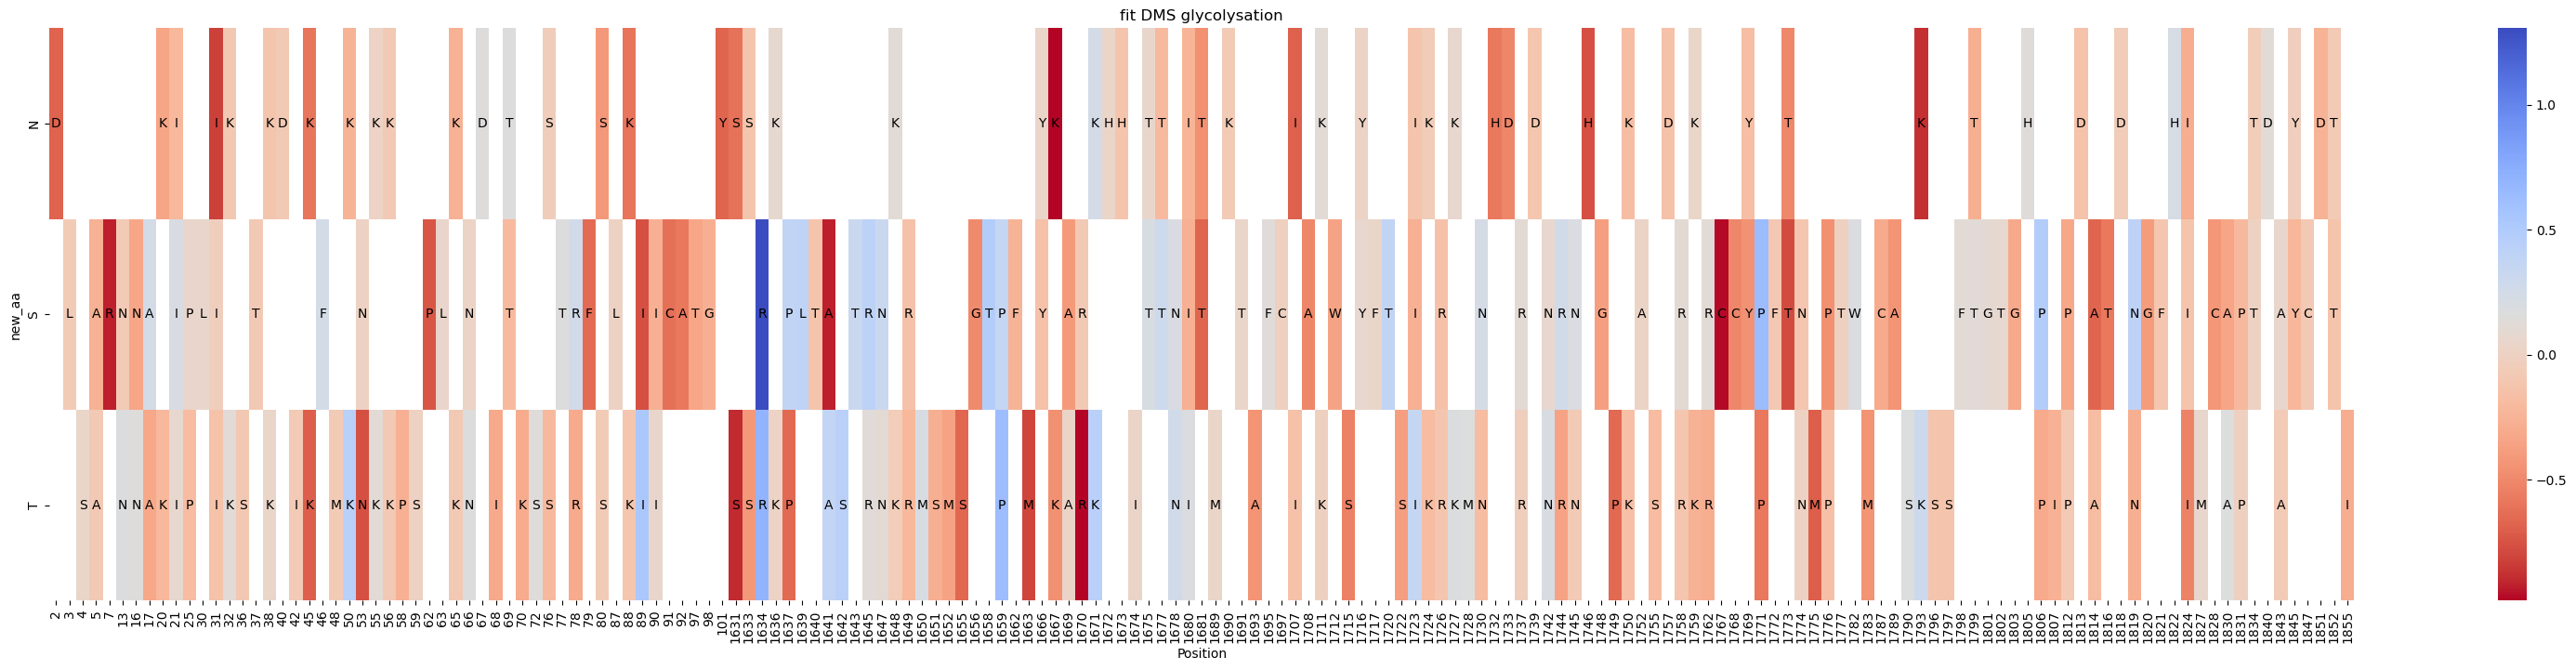

In [155]:
# Create the pivot table for the heatmap
heatmap_data = fit_new_glyc.pivot(index='new_aa', columns='position', values='DMS_score')

# Create the heatmap
plt.figure(figsize=(40, 8))
ax = sns.heatmap(heatmap_data, annot=False, cmap='coolwarm_r', yticklabels=True, xticklabels=True)

# Add annotations for old_aa values
for i in range(len(heatmap_data.index)):
    for j in range(len(heatmap_data.columns)):
        new_aa = heatmap_data.index[i]
        position = heatmap_data.columns[j]
        old_aa = fit_new_glyc.loc[(fit_new_glyc['new_aa'] == new_aa) & (fit_new_glyc['position'] == position), 'old_aa']
        if not old_aa.empty:
            ax.text(j + 0.5, i + 0.5, old_aa.values[0], ha='center', va='center', color='black')

# Set labels and title
plt.xlabel('Position')
plt.ylabel('new_aa')
plt.title('fit DMS glycolysation')

plt.show()


In [91]:
fit_old_acet = data_fit[data_fit['old_aa'].isin(['K'])].copy()

In [92]:
fit_old_acet

,mutant,mutated_sequence,DMS_score,DMS_score_bin,position,DMS_score_normalized,dms_score_normalized,new_aa,old_aa
115,K20T,MDLSALRVEEVQNVINAMQTILECPICLELIKEPVSTKCDHIFCKF...,-0.222576,1,20,0.695635,0.695635,T,K
116,K20Q,MDLSALRVEEVQNVINAMQQILECPICLELIKEPVSTKCDHIFCKF...,-0.780494,1,20,0.584609,0.584609,Q,K
117,K20N,MDLSALRVEEVQNVINAMQNILECPICLELIKEPVSTKCDHIFCKF...,-0.340887,1,20,0.672091,0.672091,N,K
118,K20I,MDLSALRVEEVQNVINAMQIILECPICLELIKEPVSTKCDHIFCKF...,-0.207838,1,20,0.698568,0.698568,I,K
119,K20E,MDLSALRVEEVQNVINAMQEILECPICLELIKEPVSTKCDHIFCKF...,-0.419305,1,20,0.656486,0.656486,E,K
...,...,...,...,...,...,...,...,...,...
1483,K1793T,MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,0.304857,1,1793,0.800594,0.800594,T,K
1484,K1793R,MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,0.472240,1,1793,0.833904,0.833904,R,K
1485,K1793Q,MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,0.190833,1,1793,0.777904,0.777904,Q,K
1486,K1793N,MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-0.876198,1,1793,0.565564,0.565564,N,K


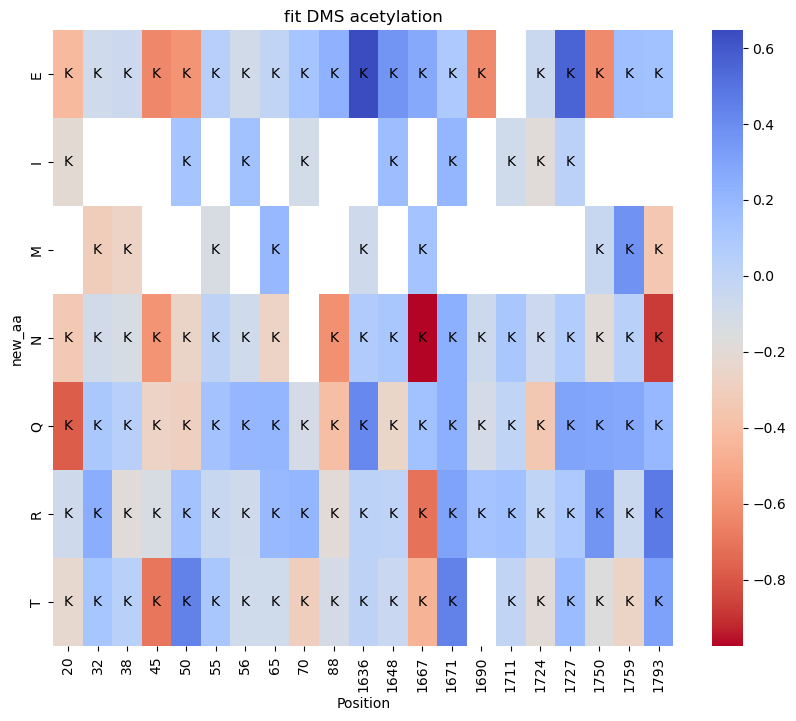

In [156]:
# Create the pivot table for the heatmap
heatmap_data = fit_old_acet.pivot(index='new_aa', columns='position', values='DMS_score')

# Create the heatmap
plt.figure(figsize=(10, 8))
ax = sns.heatmap(heatmap_data, annot=False, cmap='coolwarm_r', yticklabels=True, xticklabels=True)

# Add annotations for old_aa values
for i in range(len(heatmap_data.index)):
    for j in range(len(heatmap_data.columns)):
        new_aa = heatmap_data.index[i]
        position = heatmap_data.columns[j]
        old_aa = fit_old_acet.loc[(fit_old_acet['new_aa'] == new_aa) & (fit_old_acet['position'] == position), 'old_aa']
        if not old_aa.empty:
            ax.text(j + 0.5, i + 0.5, old_aa.values[0], ha='center', va='center', color='black')

# Set labels and title
plt.xlabel('Position')
plt.ylabel('new_aa')
plt.title('fit DMS acetylation')

plt.show()

In [94]:
fit_new_acet = data_fit[data_fit['new_aa'].isin(['K'])].copy()

In [95]:
fit_new_acet


,mutant,mutated_sequence,DMS_score,DMS_score_bin,position,DMS_score_normalized,dms_score_normalized,new_aa,old_aa
52,E9K,MDLSALRVKEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-0.649333,1,9,0.610710,0.610710,K,E
55,E10K,MDLSALRVEKVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-0.769616,1,10,0.586774,0.586774,K,E
65,Q12K,MDLSALRVEEVKNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,0.078567,1,12,0.755563,0.755563,K,Q
71,N13K,MDLSALRVEEVQKVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-0.041871,1,13,0.731595,0.731595,K,N
93,N16K,MDLSALRVEEVQNVIKAMQKILECPICLELIKEPVSTKCDHIFCKF...,0.061940,1,16,0.752254,0.752254,K,N
...,...,...,...,...,...,...,...,...,...
1726,E1836K,MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-0.299933,1,1836,0.680241,0.680241,K,E
1784,Q1846K,MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-0.085173,1,1846,0.722978,0.722978,K,Q
1794,Q1848K,MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,0.065825,1,1848,0.753027,0.753027,K,Q
1799,E1849K,MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-0.142875,1,1849,0.711496,0.711496,K,E


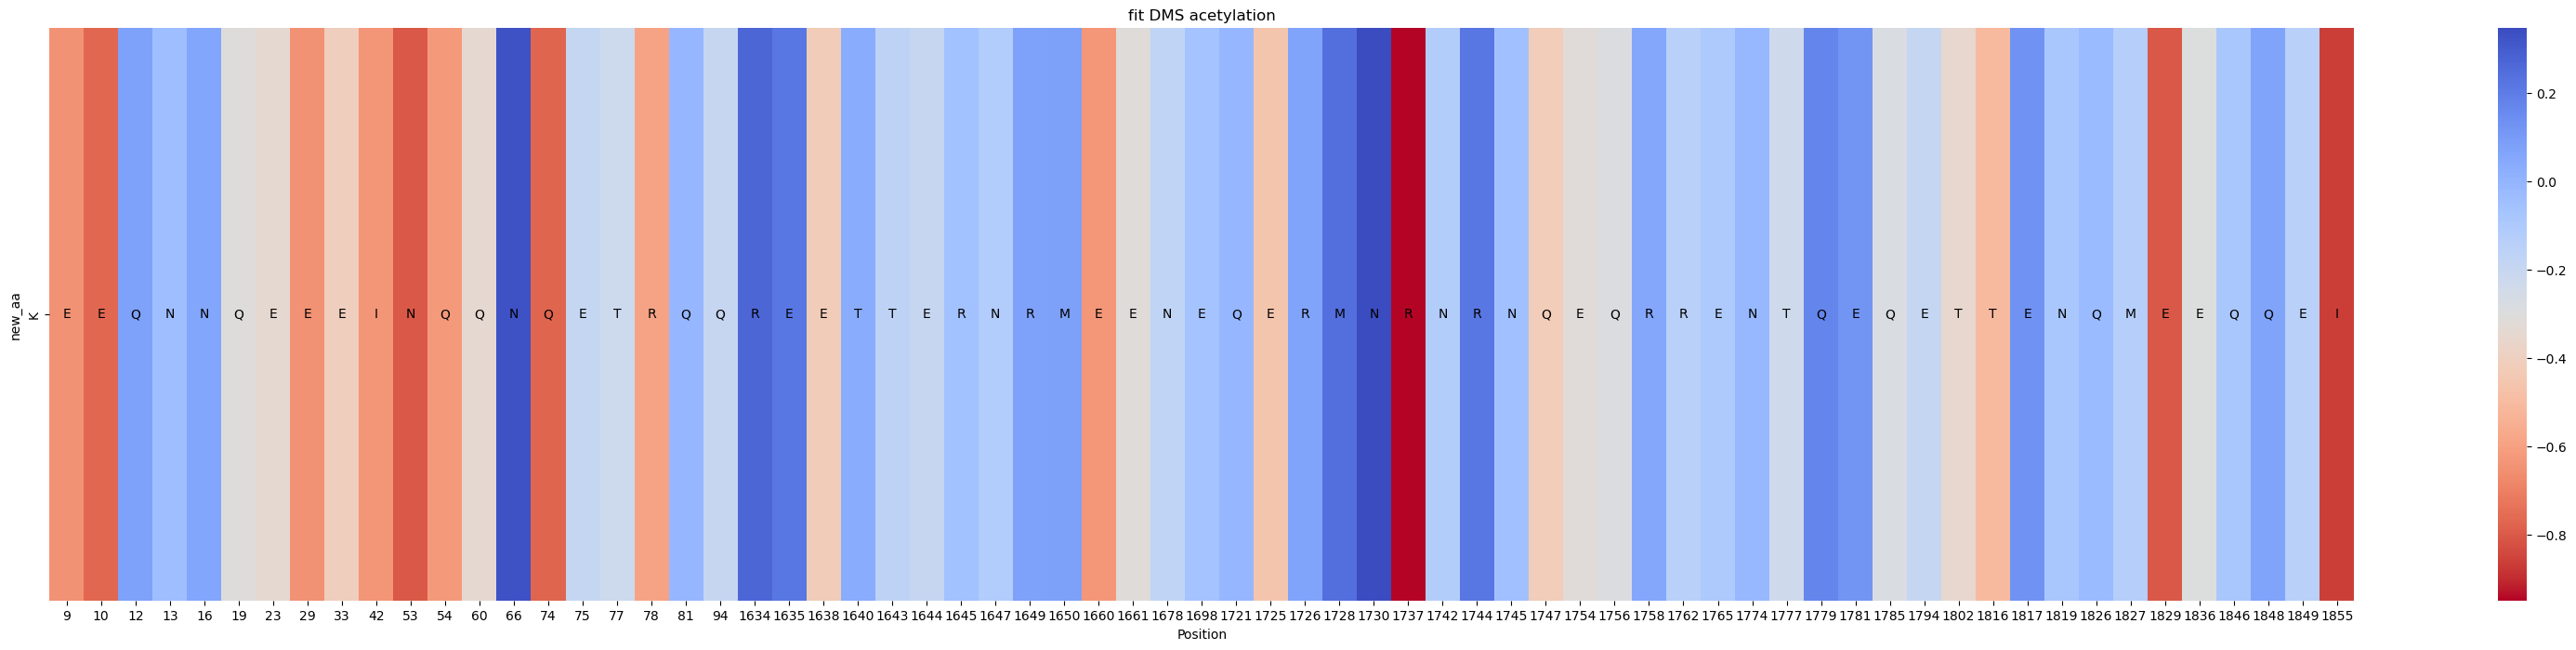

In [157]:
# Create the pivot table for the heatmap
heatmap_data = fit_new_acet.pivot(index='new_aa', columns='position', values='DMS_score')

# Create the heatmap
plt.figure(figsize=(40, 8))
ax = sns.heatmap(heatmap_data, annot=False, cmap='coolwarm_r', yticklabels=True, xticklabels=True)

# Add annotations for old_aa values
for i in range(len(heatmap_data.index)):
    for j in range(len(heatmap_data.columns)):
        new_aa = heatmap_data.index[i]
        position = heatmap_data.columns[j]
        old_aa = fit_new_acet.loc[(fit_new_acet['new_aa'] == new_aa) & (fit_new_acet['position'] == position), 'old_aa']
        if not old_aa.empty:
            ax.text(j + 0.5, i + 0.5, old_aa.values[0], ha='center', va='center', color='black')

# Set labels and title
plt.xlabel('Position')
plt.ylabel('new_aa')
plt.title('fit DMS acetylation')

plt.show()


In [97]:
fit_old_phos = data_fit[data_fit['old_aa'].isin(['S', 'T', 'Y'])].copy()

In [98]:
fit_old_phos

,mutant,mutated_sequence,DMS_score,DMS_score_bin,position,DMS_score_normalized,dms_score_normalized,new_aa,old_aa
17,S4Y,MDLYALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-0.255390,1,4,0.689105,0.689105,Y,S
18,S4A,MDLAALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,0.073691,1,4,0.754592,0.754592,A,S
19,S4P,MDLPALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-0.330096,1,4,0.674239,0.674239,P,S
20,S4F,MDLFALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-0.495239,1,4,0.641375,0.641375,NaN,S
21,S4C,MDLCALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-0.245299,1,4,0.691113,0.691113,C,S
...,...,...,...,...,...,...,...,...,...
1816,T1852P,MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-0.067412,1,1852,0.726513,0.726513,P,T
1817,T1852S,MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-0.131134,1,1852,0.713832,0.713832,S,T
1818,T1852A,MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,0.309628,1,1852,0.801544,0.801544,A,T
1819,T1852I,MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-0.152108,1,1852,0.709658,0.709658,I,T


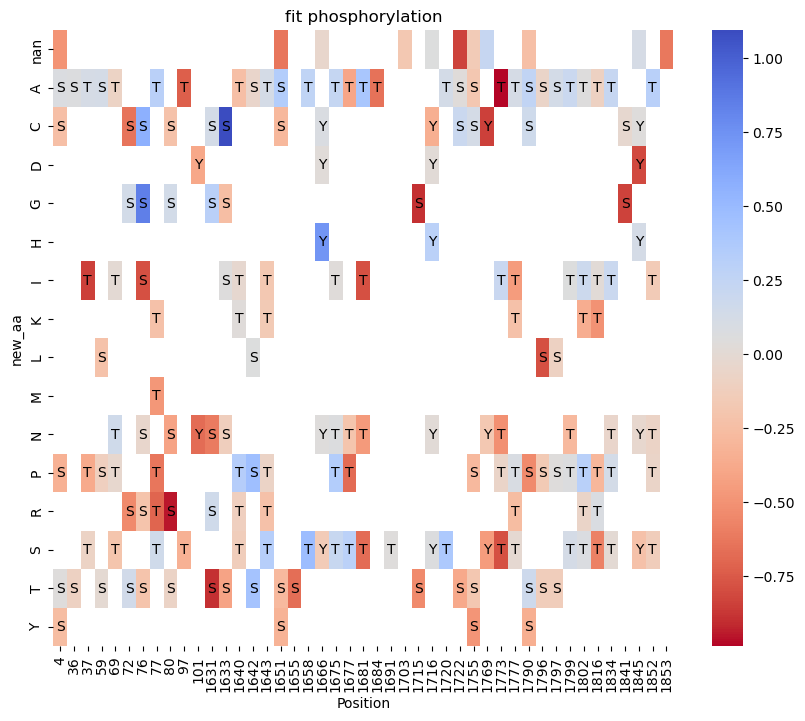

In [158]:
# Create the pivot table for the heatmap
heatmap_data = fit_old_phos.pivot(index='new_aa', columns='position', values='DMS_score')

# Create the heatmap
plt.figure(figsize=(10, 8))
ax = sns.heatmap(heatmap_data, annot=False, cmap='coolwarm_r', yticklabels=True, xticklabels=True)

# Add annotations for old_aa values
for i in range(len(heatmap_data.index)):
    for j in range(len(heatmap_data.columns)):
        new_aa = heatmap_data.index[i]
        position = heatmap_data.columns[j]
        old_aa = fit_old_phos.loc[(fit_old_phos['new_aa'] == new_aa) & (fit_old_phos['position'] == position), 'old_aa']
        if not old_aa.empty:
            ax.text(j + 0.5, i + 0.5, old_aa.values[0], ha='center', va='center', color='black')

# Set labels and title
plt.xlabel('Position')
plt.ylabel('new_aa')
plt.title('fit phosphorylation')

plt.show()

In [100]:
fit_new_phos = data_fit[data_fit['new_aa'].isin(['S', 'T', 'Y'])].copy()

In [101]:
fit_old_phos

,mutant,mutated_sequence,DMS_score,DMS_score_bin,position,DMS_score_normalized,dms_score_normalized,new_aa,old_aa
17,S4Y,MDLYALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-0.255390,1,4,0.689105,0.689105,Y,S
18,S4A,MDLAALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,0.073691,1,4,0.754592,0.754592,A,S
19,S4P,MDLPALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-0.330096,1,4,0.674239,0.674239,P,S
20,S4F,MDLFALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-0.495239,1,4,0.641375,0.641375,NaN,S
21,S4C,MDLCALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-0.245299,1,4,0.691113,0.691113,C,S
...,...,...,...,...,...,...,...,...,...
1816,T1852P,MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-0.067412,1,1852,0.726513,0.726513,P,T
1817,T1852S,MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-0.131134,1,1852,0.713832,0.713832,S,T
1818,T1852A,MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,0.309628,1,1852,0.801544,0.801544,A,T
1819,T1852I,MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-0.152108,1,1852,0.709658,0.709658,I,T


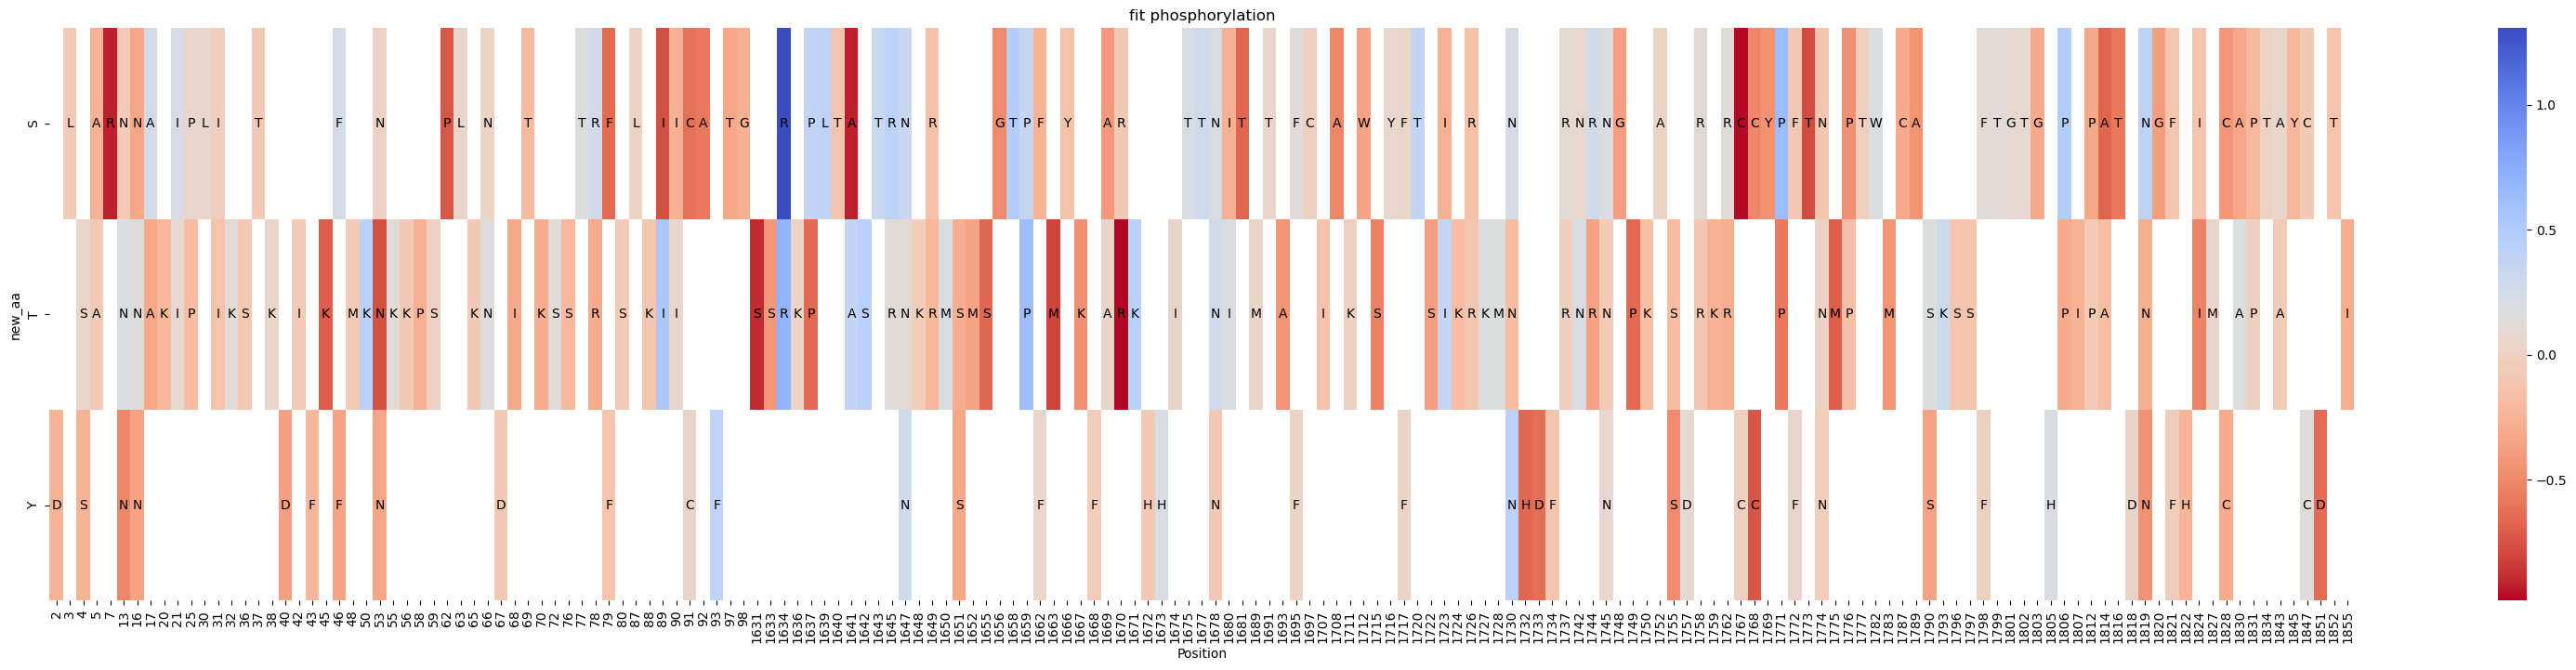

In [159]:
# Create the pivot table for the heatmap
heatmap_data = fit_new_phos.pivot(index='new_aa', columns='position', values='DMS_score')

# Create the heatmap
plt.figure(figsize=(40, 8))
ax = sns.heatmap(heatmap_data, annot=False, cmap='coolwarm_r', yticklabels=True, xticklabels=True)

# Add annotations for old_aa values
for i in range(len(heatmap_data.index)):
    for j in range(len(heatmap_data.columns)):
        new_aa = heatmap_data.index[i]
        position = heatmap_data.columns[j]
        old_aa = fit_new_phos.loc[(fit_new_phos['new_aa'] == new_aa) & (fit_new_phos['position'] == position), 'old_aa']
        if not old_aa.empty:
            ax.text(j + 0.5, i + 0.5, old_aa.values[0], ha='center', va='center', color='black')

# Set labels and title
plt.xlabel('Position')
plt.ylabel('new_aa')
plt.title('fit phosphorylation')

plt.show()